In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [141]:
titanic_df =pd.read_csv('train.csv')

In [142]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## who were the passengers of titanic

- 1.who were the passengers of titanic(their ages,classes,gender), where they are come from(cities)
- who was alone and who wa with family
- what factor helped them from sinking titanic

1. who were the passengers of titanic

### Univariate:

<Axes: xlabel='Age', ylabel='Density'>

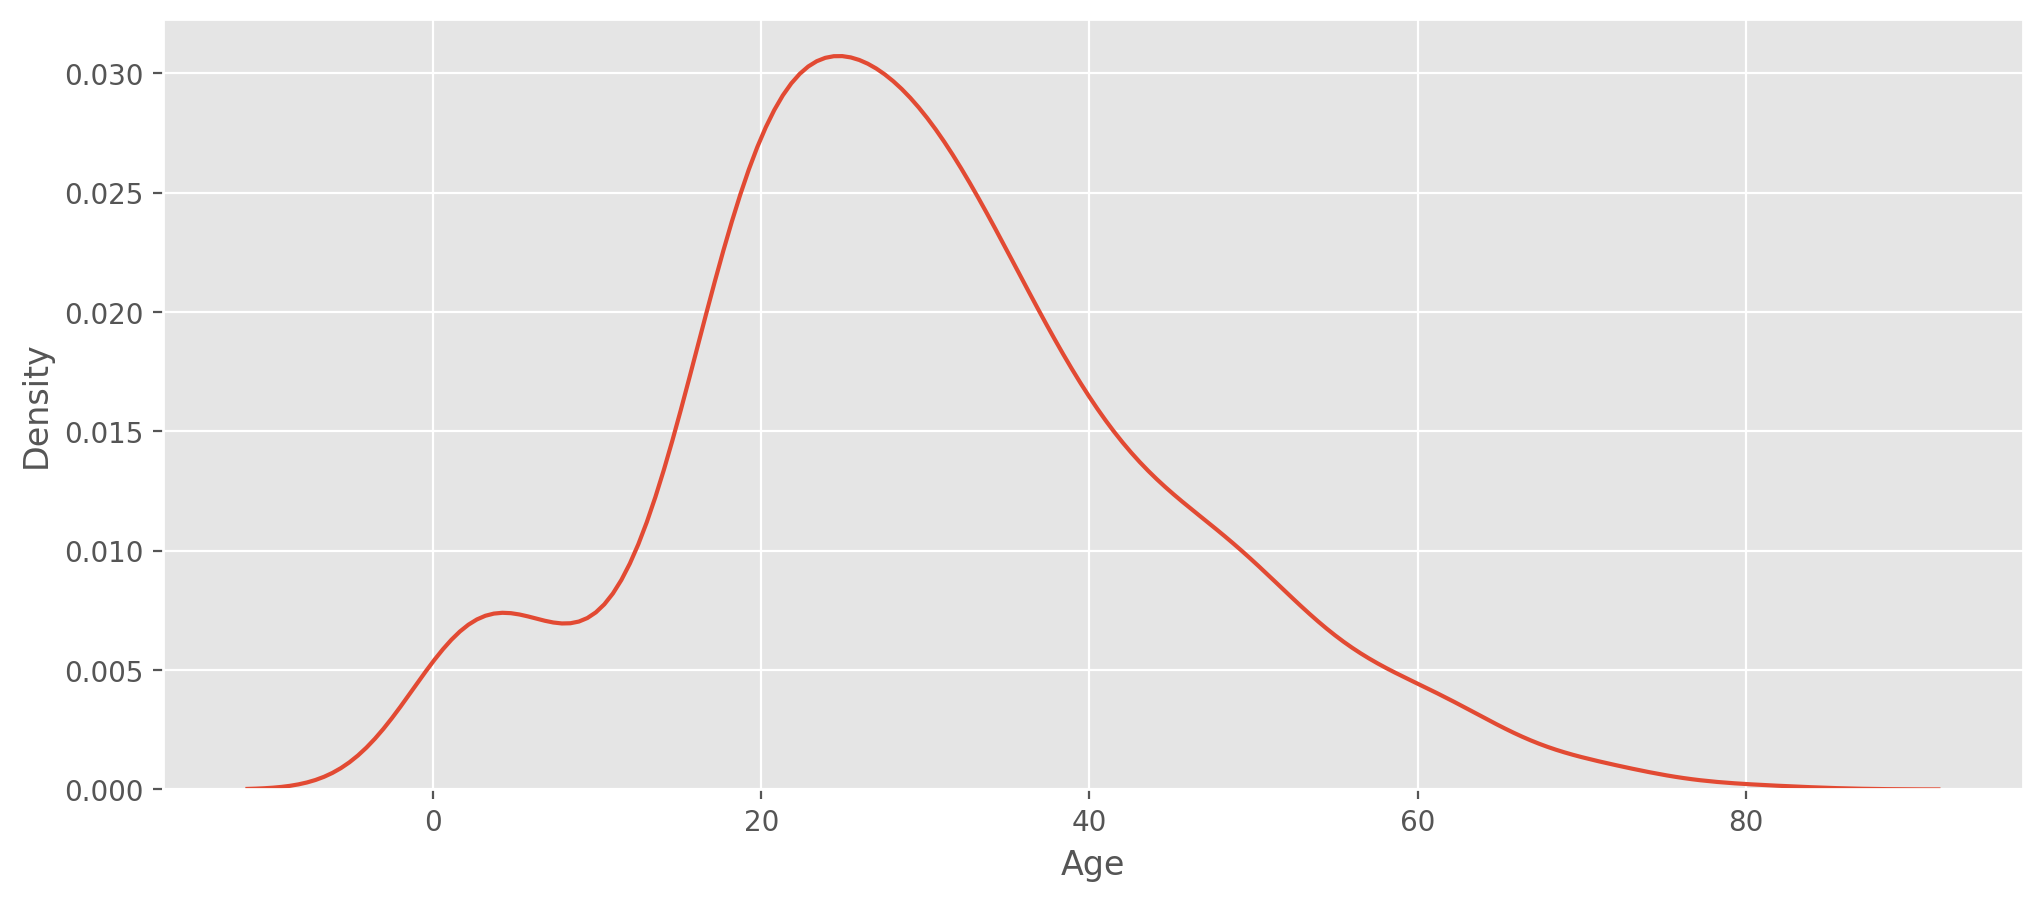

In [144]:
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(titanic_df.Age, hist = False)

In [145]:
# Creating a new column family_members by adding SibSp and Parch
titanic_df['family_members'] = titanic_df.SibSp + titanic_df.Parch
titanic_df.drop(['SibSp', 'Parch'], inplace = True, axis = 1)

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,C,1


<Axes: ylabel='Density'>

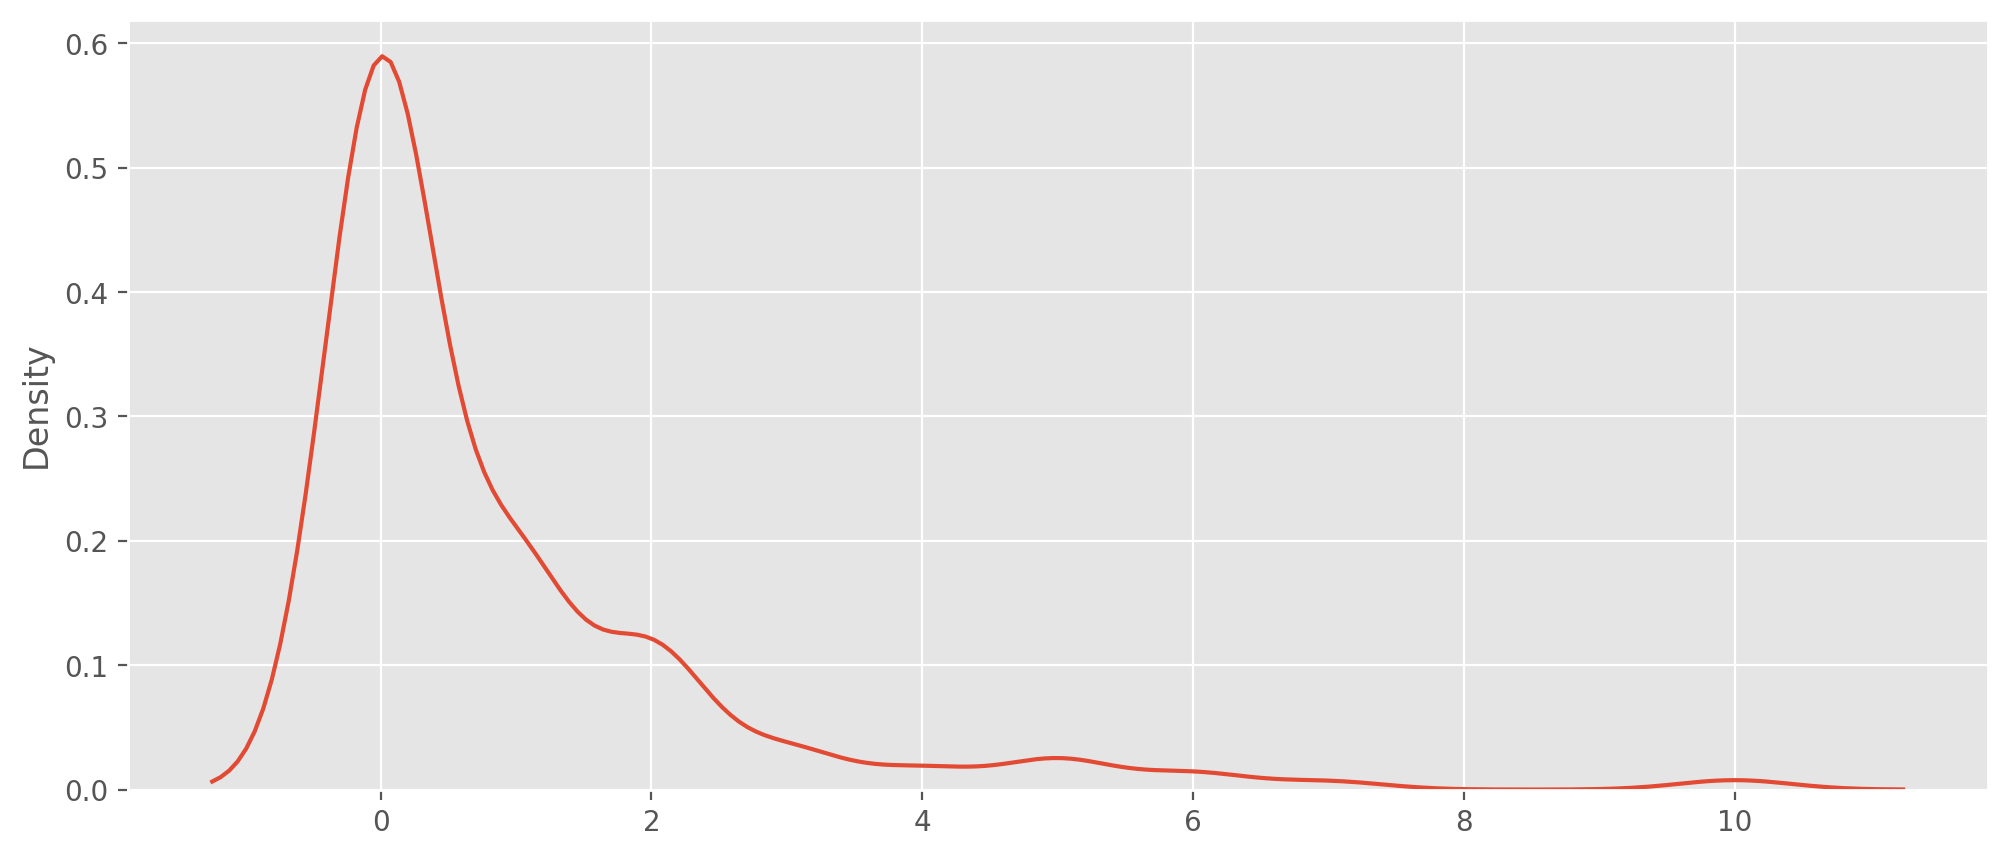

In [146]:
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(x =titanic_df['family_members'], hist = False)

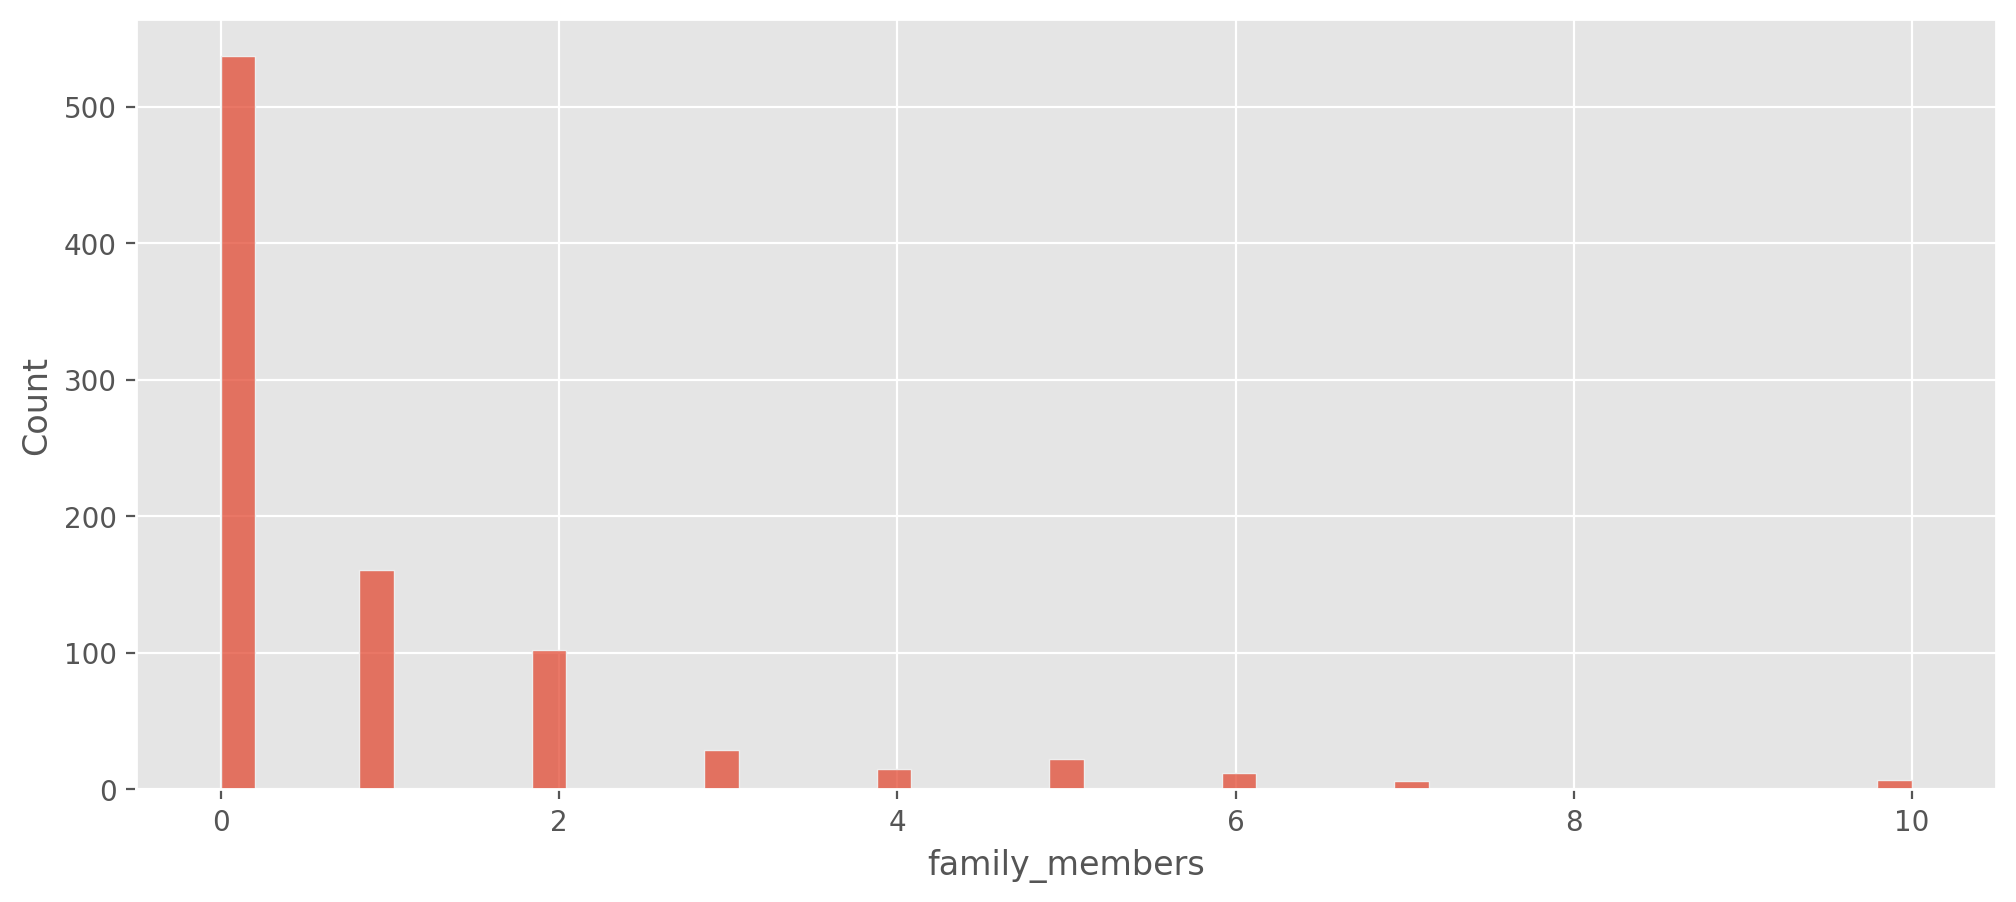

In [147]:
plt.figure(figsize=(12, 5), dpi=200)
sns.histplot(x=titanic_df['family_members'], kde=False)
plt.show()


maximum of 1 family member travelled with the person in titanic

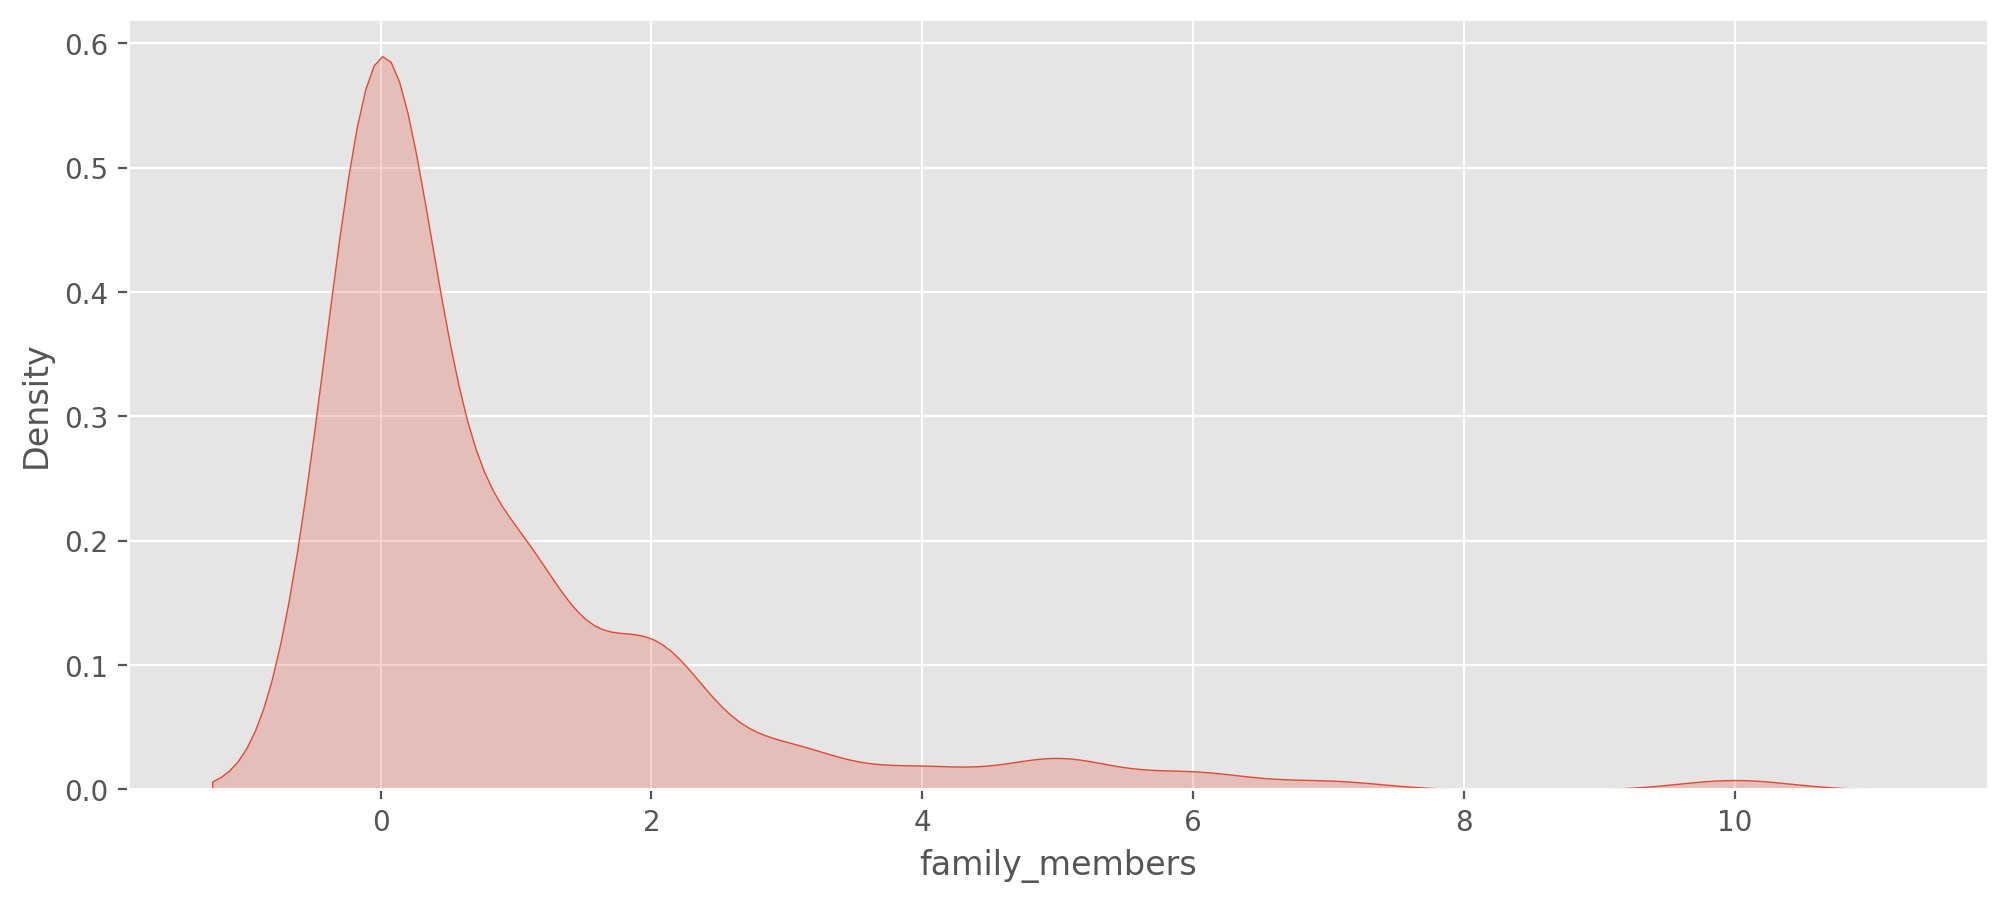

In [39]:
plt.figure(figsize=(12, 5), dpi=200)
sns.kdeplot(x=titanic_df['family_members'], fill=True)
plt.show()


### Bivariate:

<Axes: xlabel='family_members', ylabel='count'>

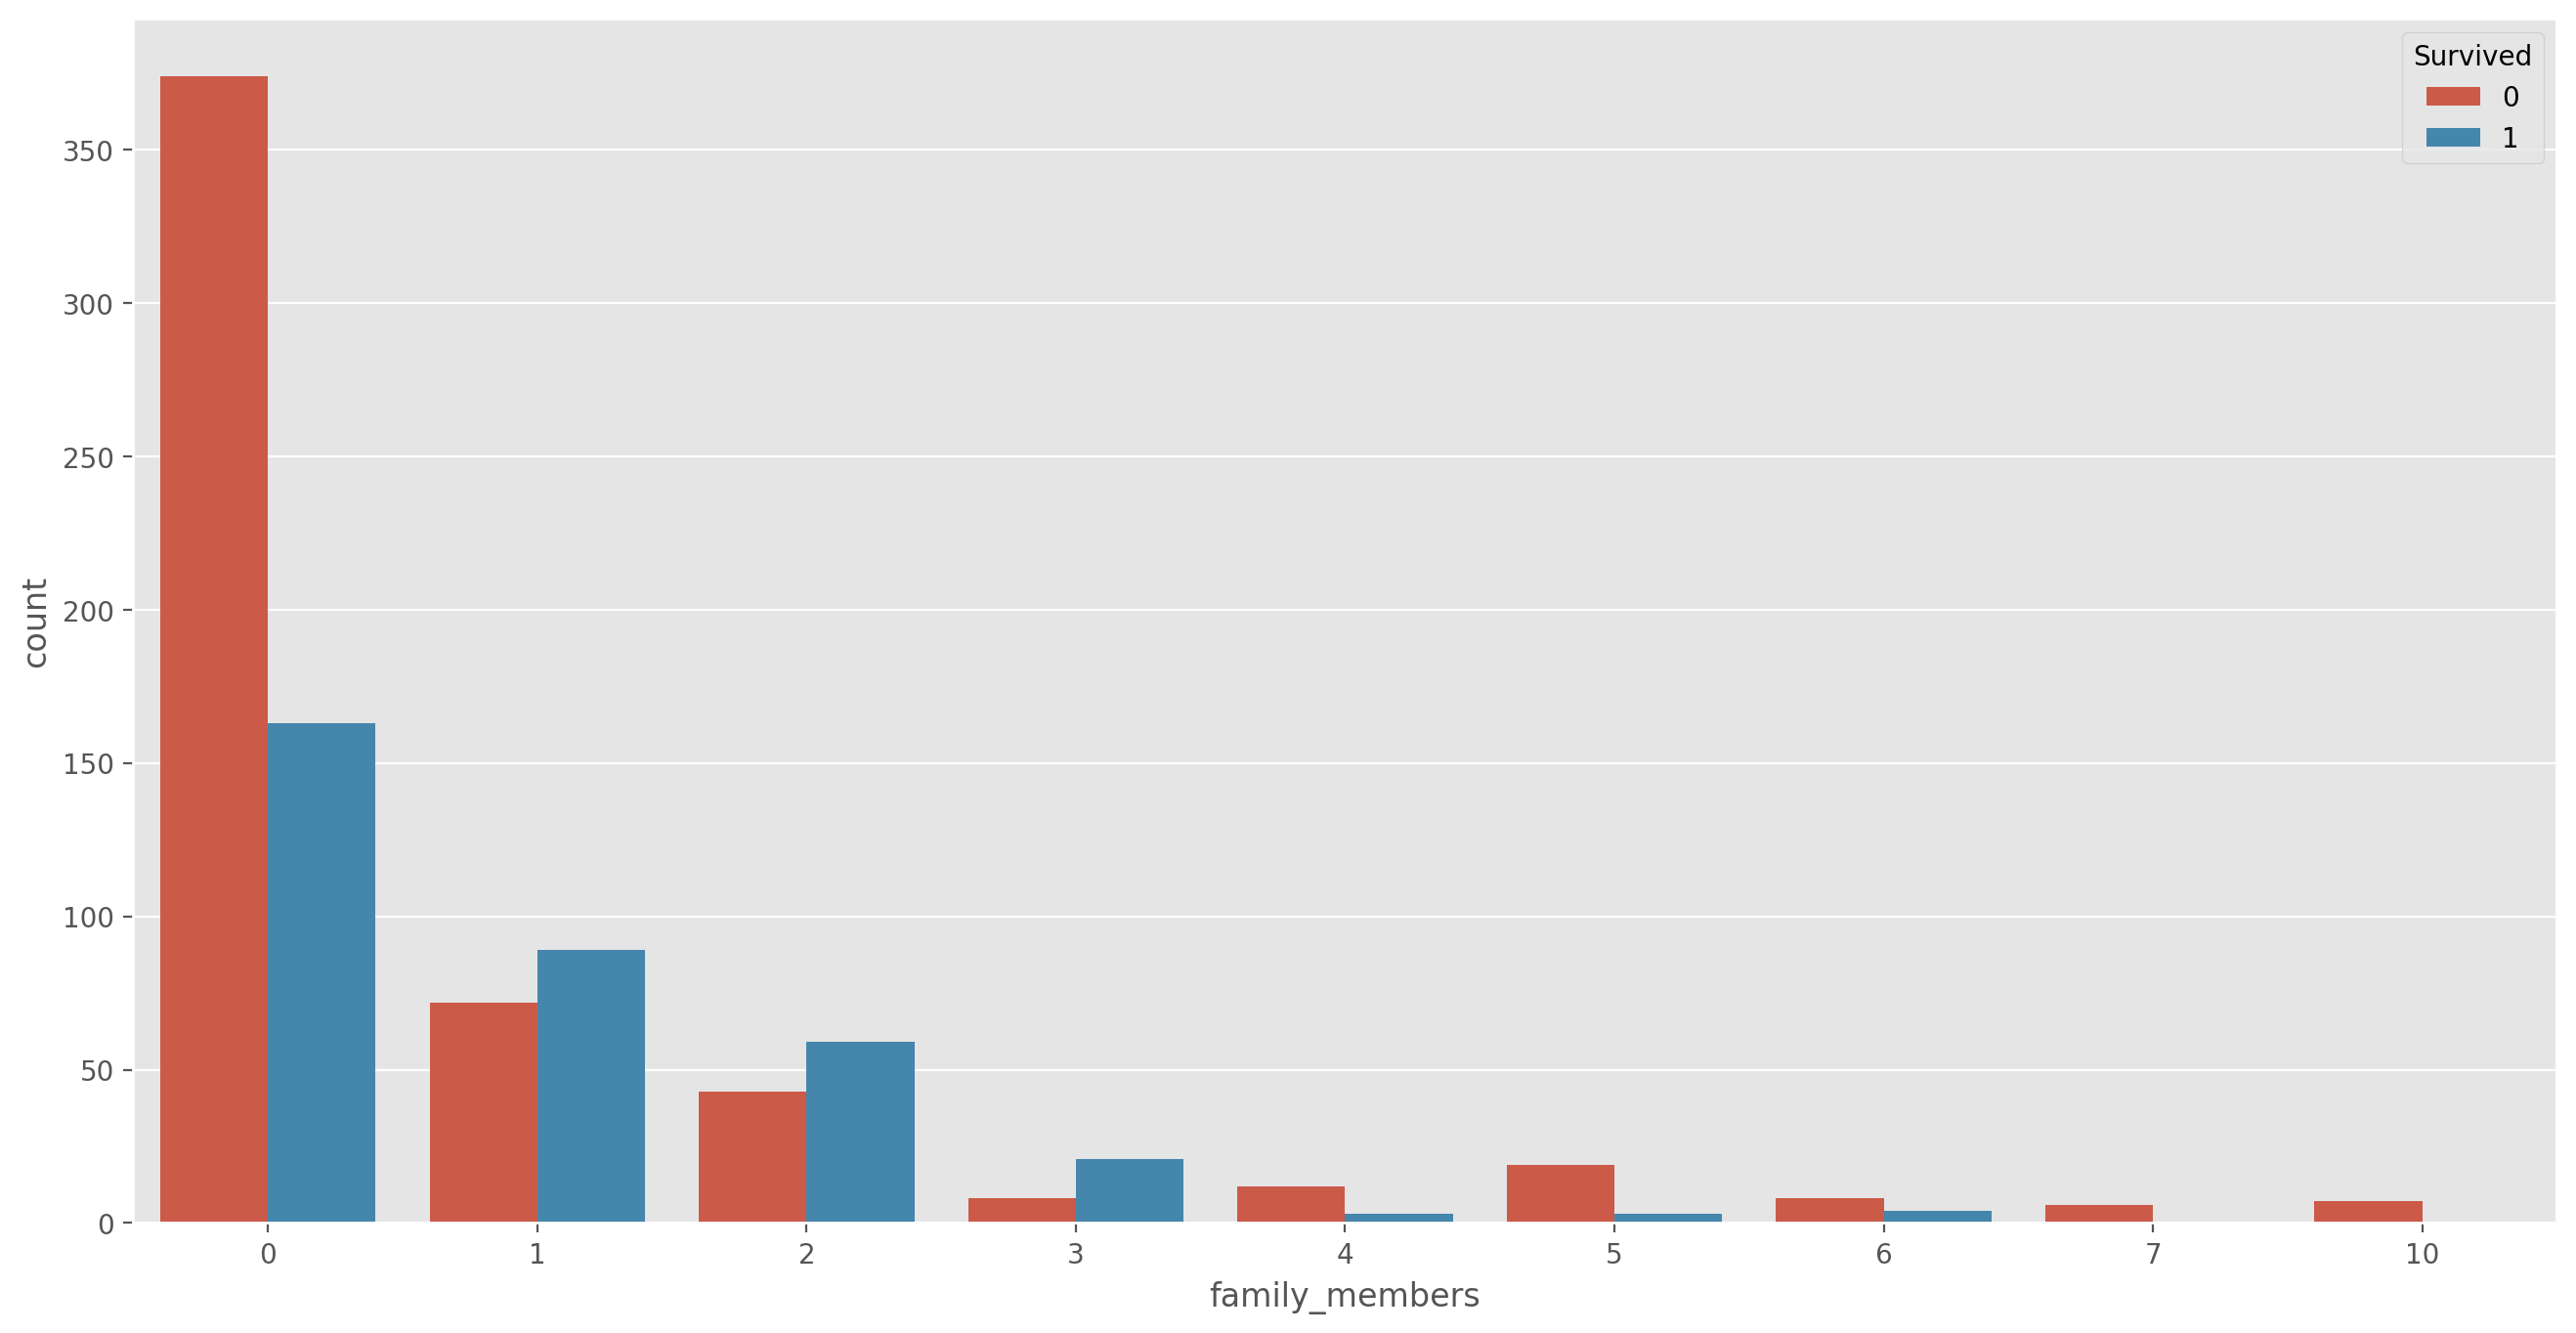

In [149]:
# Family members and survived
plt.figure(figsize = (16,8), dpi = 200)
sns.countplot(x='family_members', hue = 'Survived', data = titanic_df)

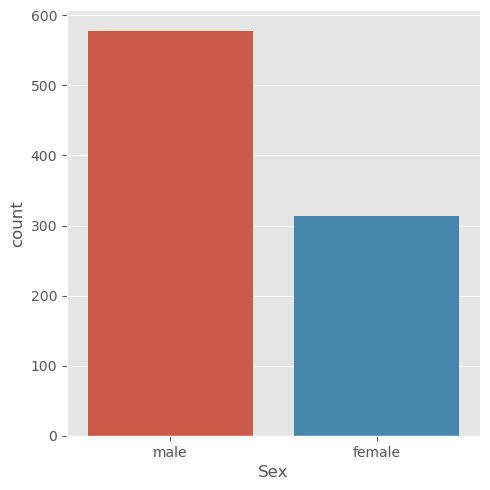

In [150]:
# catplot for col arg
sns.catplot(x='Sex', data=titanic_df, kind='count')
plt.show()



The output of this code will be a bar plot with two bars, one for each category in the 'Sex' column ('male' and 'female'). Each bar will represent the count of occurrences of that category in the dataset.


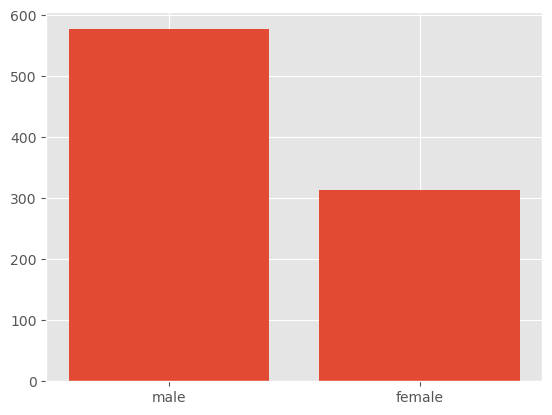

In [308]:
sex_counts = titanic_df['Sex'].value_counts()
plt.bar(sex_counts.index, sex_counts)
plt.show()


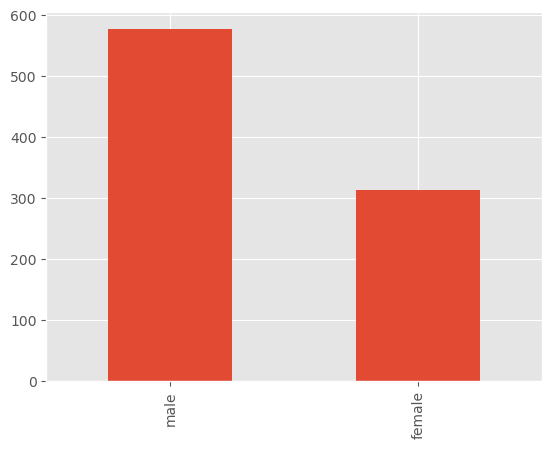

In [309]:
titanic_df['Sex'].value_counts().plot(kind='bar')
plt.show()


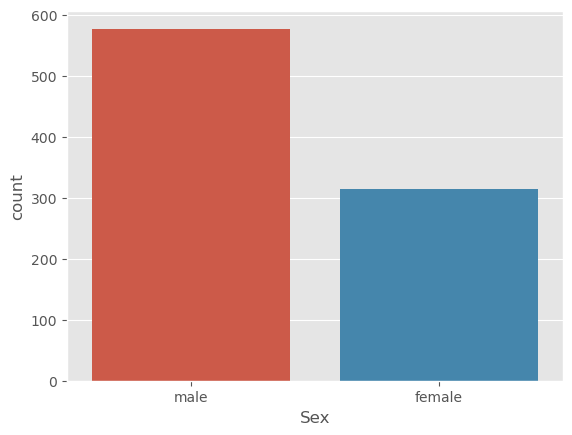

In [46]:
sns.countplot(x='Sex', data=titanic_df)
plt.show()


Let's compare the `countplot`, `catplot`, and `barplot` methods in terms of their usage and features:

1. **countplot (Seaborn):**
   ```python
   sns.countplot(x='Sex', data=titanic_df)
   plt.show()
   ```
   - **Pros:**
     - Simple syntax for basic count plots.
     - Automatically counts occurrences of each category.
     - Can handle categorical data efficiently.
     - Built on top of Matplotlib, so it integrates well with Seaborn.

   - **Cons:**
     - Limited flexibility for customization compared to `catplot`.

2. **catplot (Seaborn):**
   ```python
   sns.catplot(x='Sex', data=titanic_df, kind='count')
   plt.show()
   ```
   - **Pros:**
     - More versatile; can handle different plot types through the `kind` parameter.
     - Can be extended to handle multiple categorical or numerical variables.
     - Offers additional customization options.

   - **Cons:**
     - Overhead for simple plots, as it's a higher-level interface.

3. **bar (Matplotlib):**
   ```python
   sex_counts = titanic_df['Sex'].value_counts()
   plt.bar(sex_counts.index, sex_counts)
   plt.show()
   ```
   - **Pros:**
     - Direct control over Matplotlib allows for extensive customization.
     - Can be more suitable for complex plots or when fine-tuning is required.

   - **Cons:**
     - Requires more code for basic count plots.
     - Not as concise for simple visualizations.

**Which method to choose:**
- For quick and simple count plots, especially with Seaborn, `countplot` is straightforward and efficient.
- If you need more versatility and want to explore different plot types or handle more complex scenarios, `catplot` is a good choice.
- If you prefer a more fine-grained control over customization and appearance, especially when creating more complex plots, using Matplotlib directly with `bar` might be preferred.

In conclusion, the choice depends on the specific requirements of your analysis or visualization. For most simple count plots, `countplot` or `catplot` would be convenient and sufficient. If you need more control and customization, especially for complex plots, using Matplotlib directly might be the best option.

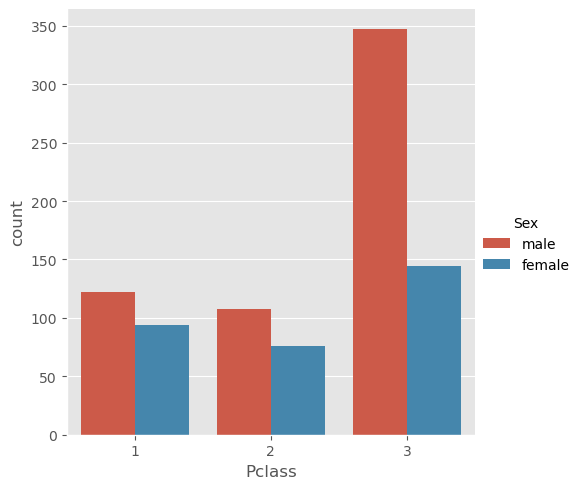

In [151]:
sns.catplot(hue='Sex',data=titanic_df,x='Pclass',kind='count')




1. **`sns.catplot`**: This is a Seaborn function used for creating categorical plots. It is a higher-level interface that can generate various types of plots depending on the `kind` parameter.

2. **`hue='Sex'`**: The `hue` parameter is used to introduce an additional categorical variable to the plot. In this case, it adds a color distinction based on the 'Sex' column. Each category in 'Sex' will be represented by a different color.

3. **`data=titanic_df`**: This parameter specifies the DataFrame containing the data to be plotted, which is `titanic_df` in this case.

4. **`x='Pclass'`**: This parameter specifies the variable to be plotted on the x-axis. In this case, it's the 'Pclass' column from the DataFrame `titanic_df`.

5. **`kind='count'`**: The `kind` parameter specifies the type of plot to be created. In this case, it's a count plot. It will show the count of observations for each combination of 'Pclass' and 'Sex'.

Now, the overall purpose of this code is to create a count plot that visualizes the distribution of passengers across different passenger classes ('Pclass'), with each bar further divided by the 'Sex' category. The resulting plot will have bars for each combination of 'Pclass' and 'Sex', and the colors will represent the genders within each class.

To show this plot, you can use `plt.show()` after the `sns.catplot` code.

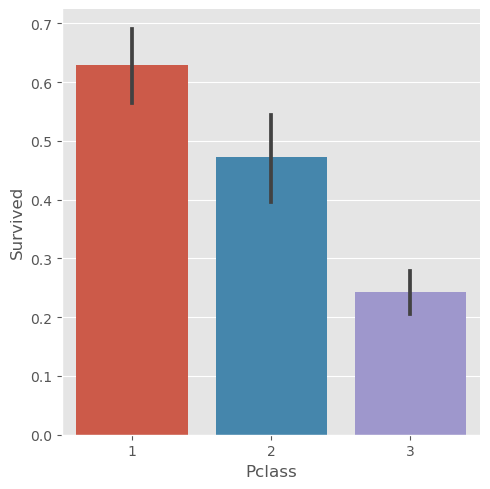

In [310]:

# Bar plot
sns.catplot(x='Pclass', y='Survived', data=titanic_df, kind='bar')
plt.show()


The overall purpose of this code is to create a bar plot that visualizes the relationship between the passenger class ('Pclass') and the survival status ('Survived') using the data in the `titanic_df` DataFrame. The resulting plot will have bars for each category in 'Pclass', and the height of the bars will represent either the average or count of survivors in each class, depending on the `kind` parameter.

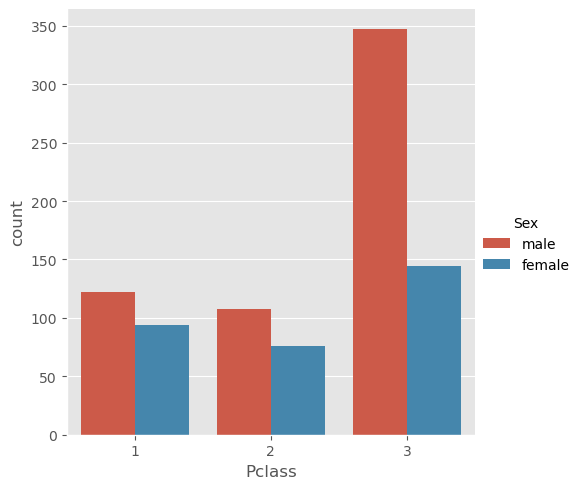

In [311]:
# Count plot showing the population of males and females in each class
sns.catplot(x='Pclass', hue='Sex', data=titanic_df, kind='count')
plt.show()


 This code is to create a count plot that visualizes the distribution of passengers across different passenger classes ('Pclass') with each bar further divided by the 'Sex' category. The resulting plot will have bars for each combination of 'Pclass' and 'Sex', and the colors will represent the genders within each class.

The plot gives a clear overview of the count of passengers in each class, with a breakdown based on gender. It helps in understanding how the distribution of passengers varies across passenger classes and gender categories.

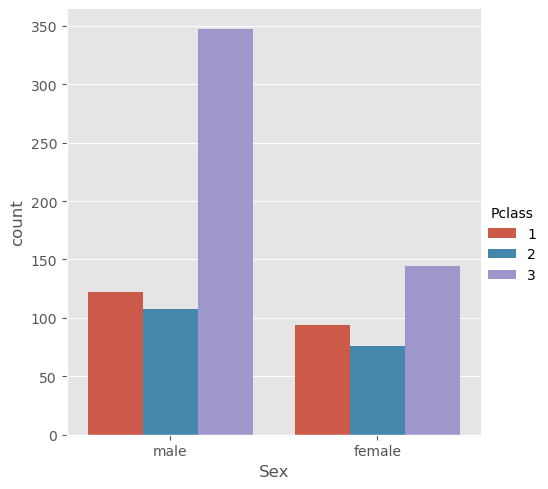

In [312]:
sns.catplot(x='Sex', data=titanic_df, kind='count',hue='Pclass')
plt.show()


The overall purpose of this code is to create a count plot that visualizes the distribution of passengers based on gender ('Sex') with each bar further divided by the passenger class ('Pclass'). The resulting plot will have bars for each category in 'Sex', and different colors will represent the different passenger classes.

This plot provides insights into the distribution of passengers in terms of gender and passenger class. It helps in understanding how the number of passengers varies across gender categories within each passenger class.

<Figure size 2400x1000 with 0 Axes>

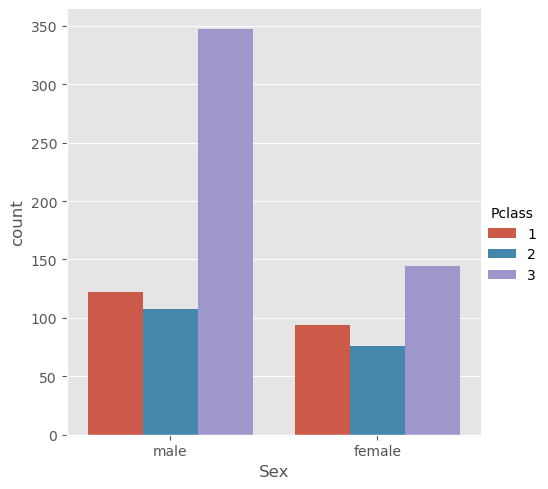

In [154]:
plt.figure(figsize = (12,5), dpi = 200)
sns.catplot(x='Sex',data=titanic_df,hue='Pclass',kind='count')
plt.show()

The purpose of this code is to create a count plot using Seaborn with additional customization. The Matplotlib figure size and resolution are adjusted before creating the count plot. The resulting plot will show the distribution of passengers based on gender ('Sex') with each bar further divided by the passenger class ('Pclass'). The larger figure size and higher resolution contribute to a larger and potentially more detailed visualization. Adjusting the figure size is especially useful when creating multiple subplots or when you want to control the overall size of the visual representation.

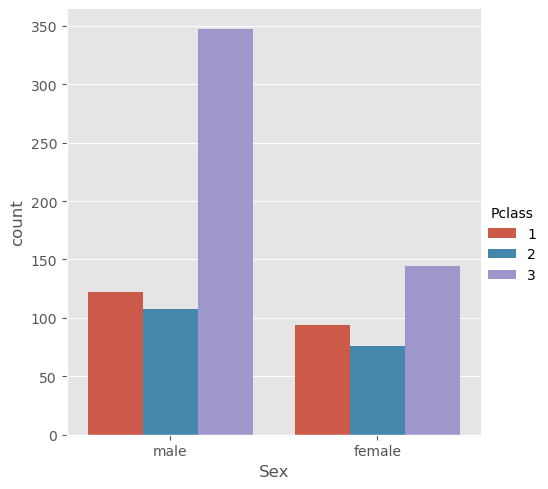

In [313]:
sns.catplot(x='Sex', hue='Pclass', data=titanic_df, kind='count')
plt.show()


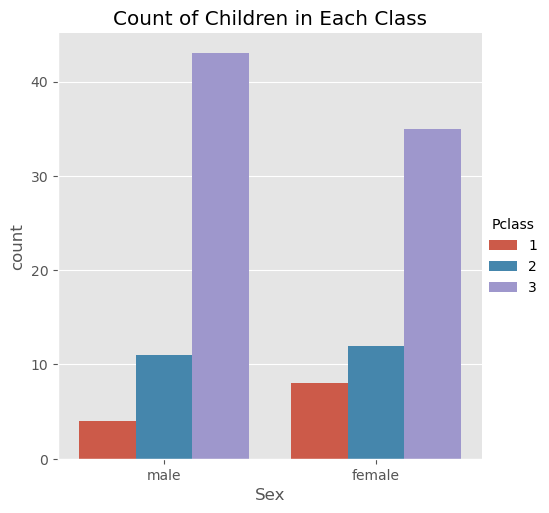

In [158]:
children_df = titanic_df[titanic_df['Age'] < 18]

# Count plot showing the count of children in each class
sns.catplot(x='Sex', hue='Pclass', data=children_df, kind='count')
plt.title('Count of Children in Each Class')
plt.show()




The overall purpose of this code is to create a count plot using Seaborn that visualizes the distribution of children across different passenger classes ('Pclass'). The x-axis represents the gender ('Sex'), and each bar is further divided by the passenger class, showing the count of children in each class. childrens are high in class3

In [314]:
children_df = titanic_df[titanic_df['Age'] < 18]

# Get the total count of children
total_children_count = len(children_df)

print("Total Count of Children:", total_children_count)


Total Count of Children: 113


In [315]:
children_df = titanic_df[titanic_df['Age'] < 18]

# Get the total count of children class-wise
children_classwise_count = children_df.groupby('Pclass').size().reset_index(name='Count')

print("Total Count of Children Class-wise:")
print(children_classwise_count)


Total Count of Children Class-wise:
   Pclass  Count
0       1     12
1       2     23
2       3     78


In [316]:
children_df = titanic_df[titanic_df['Age'] < 18]

# Group by 'class' and 'sex', and calculate the counts
children_classwise_count = children_df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

print("Total Count of Children Class-wise:")
print(children_classwise_count)


Total Count of Children Class-wise:
   Pclass     Sex  Count
0       1  female      8
1       1    male      4
2       2  female     12
3       2    male     11
4       3  female     35
5       3    male     43


In [317]:
children_pivot = children_df.pivot_table(index='Pclass', columns='Sex', aggfunc='size', fill_value=0)
children_pivot['Total'] = children_pivot['female'] + children_pivot['male']

print("Count of Male, Female, and Total Children Class-wise:")
print(children_pivot)


Count of Male, Female, and Total Children Class-wise:
Sex     female  male  Total
Pclass                     
1            8     4     12
2           12    11     23
3           35    43     78


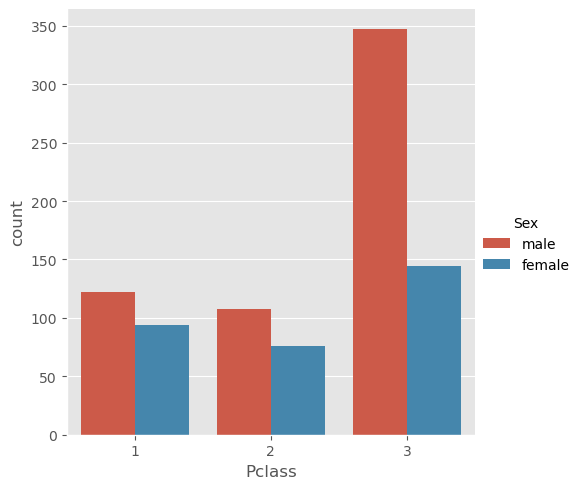

In [60]:
sns.catplot(x='Pclass', data= titanic_df, kind = 'count',hue = 'Sex')

## to get male,female,chidren survivalrate

In [383]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 18:
        return 'child'
    else:
        return sex

In [384]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [385]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_members,person,Survivor,Deck,has_family,Has_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,with Family,male,no,Unknown,with Family,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,with Family,female,yes,C,with Family,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Alone,female,yes,Unknown,Alone,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,with Family,female,yes,C,with Family,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Alone,male,no,Unknown,Alone,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q,Alone,male,no,Unknown,Alone,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S,Alone,male,no,E,Alone,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,S,with Family,child,no,Unknown,with Family,with Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,NaN,S,with Family,female,yes,Unknown,with Family,with Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,C,with Family,child,yes,Unknown,with Family,with Family


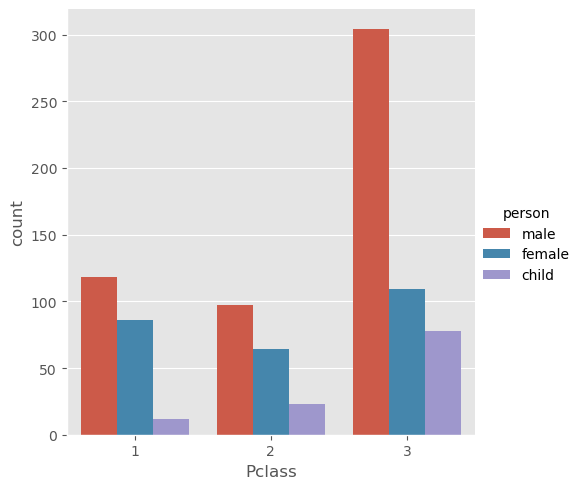

In [386]:
sns.catplot(x ='Pclass',data=titanic_df,hue='person',kind='count')

In [387]:
# to get more precise picture than above we can use instagram

<Axes: >

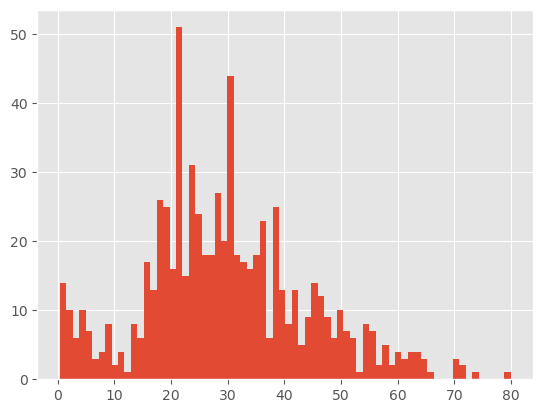

In [388]:
titanic_df['Age'].hist(bins=70)

The resulting plot will display a histogram of the distribution of ages in the dataset. Each bar represents a range of ages, and the height of the bar indicates the frequency (count) of individuals within that age range. A higher bar suggests more individuals fall within that particular age range. The `bins=70` parameter allows for a more detailed view of the age distribution, breaking it down into smaller intervals.



In [389]:
titanic_df['Age'].mean()

29.69911764705882

In [390]:
titanic_df['person'].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

<Axes: >

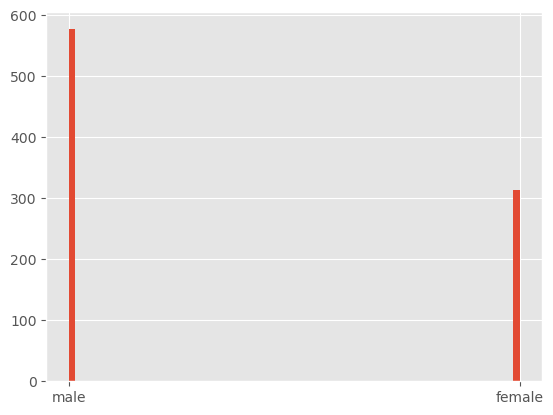

In [391]:
titanic_df['Sex'].hist(bins=70)

## KDE plots

Kernel Density Estimation (KDE) plots are used to estimate the probability density function of a continuous random variable. They provide a smooth, non-parametric way to visualize the distribution of data and can be especially useful when you want to understand the underlying probability distribution without making strong assumptions about the shape of the distribution.

Here are some reasons why KDE plots are commonly used:

1. **Smooth Representation of Distribution:**
   - KDE plots offer a smooth representation of the data distribution, which can be beneficial for visualizing trends and patterns without the jaggedness that might be present in a histogram.

2. **Non-Parametric Estimation:**
   - KDE is a non-parametric method, meaning it doesn't assume a specific form for the underlying distribution. This flexibility makes it suitable for a wide range of datasets.

3. **Visualization of Multi-Modal Distributions:**
   - KDE plots can effectively visualize multi-modal distributions (distributions with multiple peaks) that might not be apparent in other types of plots.

4. **Insight into Central Tendency and Spread:**
   - KDE plots provide insights into the central tendency and spread of the data. Features like peaks and widths in the KDE plot can give you an understanding of where most of the data is concentrated and how spread out it is.

5. **Comparison of Distributions:**
   - KDE plots can be used to compare the distributions of different datasets or different variables within the same dataset. Overlaying multiple KDE plots can highlight similarities or differences.

6. **Kernel Bandwidth Control:**
   - The bandwidth parameter in KDE allows you to control the smoothness of the estimated distribution. Adjusting the bandwidth can help you find an optimal balance between capturing details and avoiding overfitting.

7. **Integration with Other Plots:**
   - KDE plots can be combined with other types of plots (e.g., scatter plots, box plots) to provide a more comprehensive view of the data distribution.

Here's a simple example of a KDE plot in Seaborn:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = sns.load_dataset('iris')

# KDE plot for the 'sepal_length' column
sns.kdeplot(data=data['sepal_length'], fill=True)
plt.show()
```

This code generates a KDE plot for the 'sepal_length' column in the Iris dataset.

In summary, KDE plots are useful for exploring the distribution of continuous data and gaining insights into its characteristics. They are particularly valuable when you want a flexible and non-parametric representation of the data distribution.


Alright, let's imagine you have a jar of candies. Each candy has a different size, and you want to know how many candies of each size you have. Now, you could count each candy one by one, but that might take a long time. So, instead, you decide to draw a smooth curve to show how many candies you probably have for each size.

This smooth curve is like a magical paintbrush that creates a beautiful, wavy line over your candies, helping you see where most of them are and where there are fewer. This magical paintbrush is what we call a "KDE plot."

Now, let's say you have some candies that are small, some that are medium-sized, and some that are big. The KDE plot will help you see how many of each size you have, and it does it in a way that's very easy to understand.

So, in simple terms, a KDE plot is like a magic tool that helps you understand the different sizes of candies in your jar without counting each one individually.



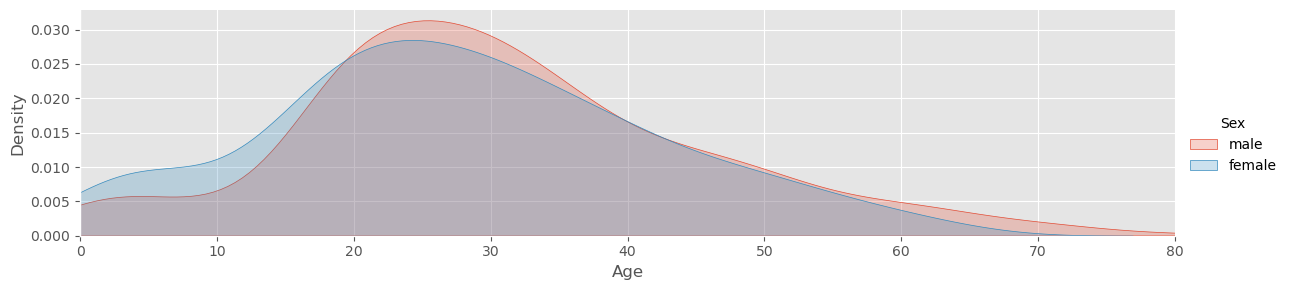

In [392]:

fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()
plt.show()

<Figure size 3200x2400 with 0 Axes>

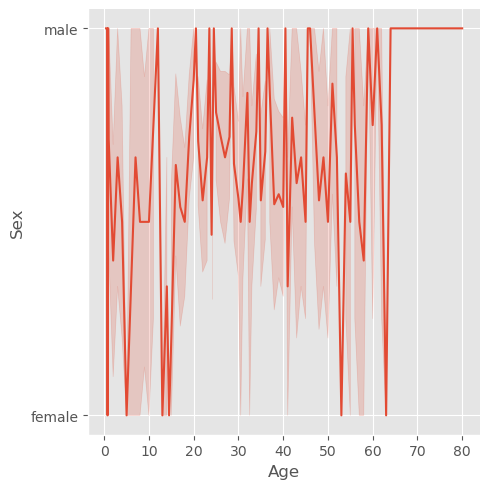

In [393]:
plt.figure(dpi = 500)
sns.relplot(x='Age', y='Sex', data = titanic_df, kind = 'line')

`relplot` is a Seaborn function used for creating relational plots. It's a higher-level interface that can generate various types of plots to show the relationship between two variables in a dataset. The `relplot` function is flexible and can produce scatter plots, line plots, and other types of plots depending on the specified `kind` parameter.

Here are some key points about `relplot`:

1. **Usage of `relplot`:**
   - `relplot` is particularly useful when you want to explore the relationship between two variables and potentially add another variable to the plot using color or different markers.
   - It's versatile and can create scatter plots (`kind='scatter'`), line plots (`kind='line'`), and other types of relational plots.

2. **When to use `relplot`:**
   - When exploring the relationship between two continuous variables or numeric data points.
   - When you want to examine trends, patterns, or correlations between variables.
   - When you want to include a third variable (e.g., using color, size, or markers) to provide additional information about the data.

3. **Alternative for `relplot`:**
   - The primary alternative for `relplot` in Seaborn is to use the specific functions for each plot type. For example:
     - `sns.scatterplot` for scatter plots.
     - `sns.lineplot` for line plots.
     - `sns.regplot` for regression plots.
   - Using these specific functions can provide more fine-grained control over the plot's appearance and customization.



Both approaches would create a scatter plot showing the relationship between 'Age' and 'Fare', with points colored by 'Pclass'. The choice between them depends on your preference, the level of customization you need, and the specific type of plot you want to create.

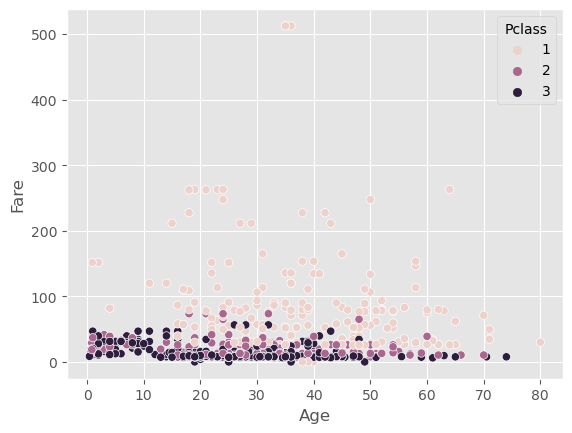

In [394]:
# Create a scatter plot
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=titanic_df)
plt.show()


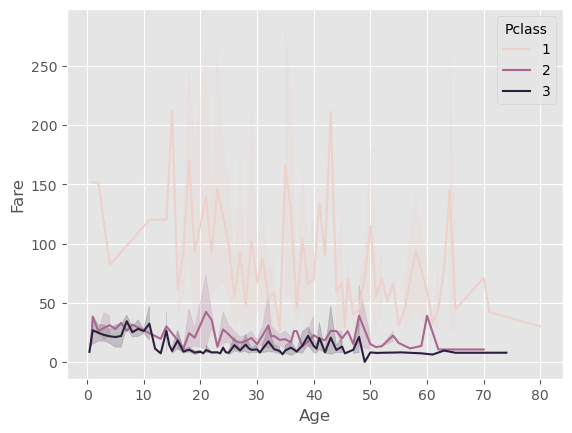

In [395]:
sns.lineplot(x='Age', y='Fare', hue='Pclass', data=titanic_df)
plt.show()


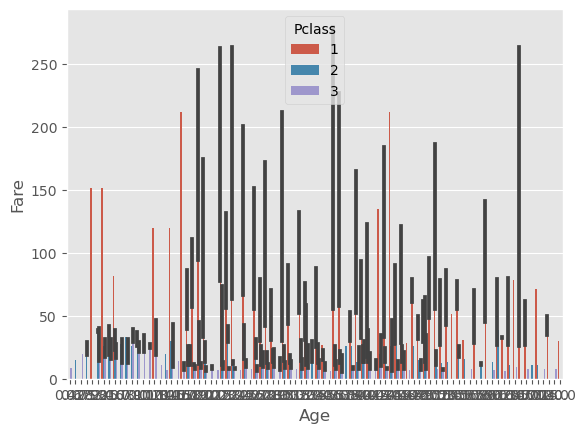

In [396]:
sns.barplot(x='Age', y='Fare', hue='Pclass', data=titanic_df)
plt.show()


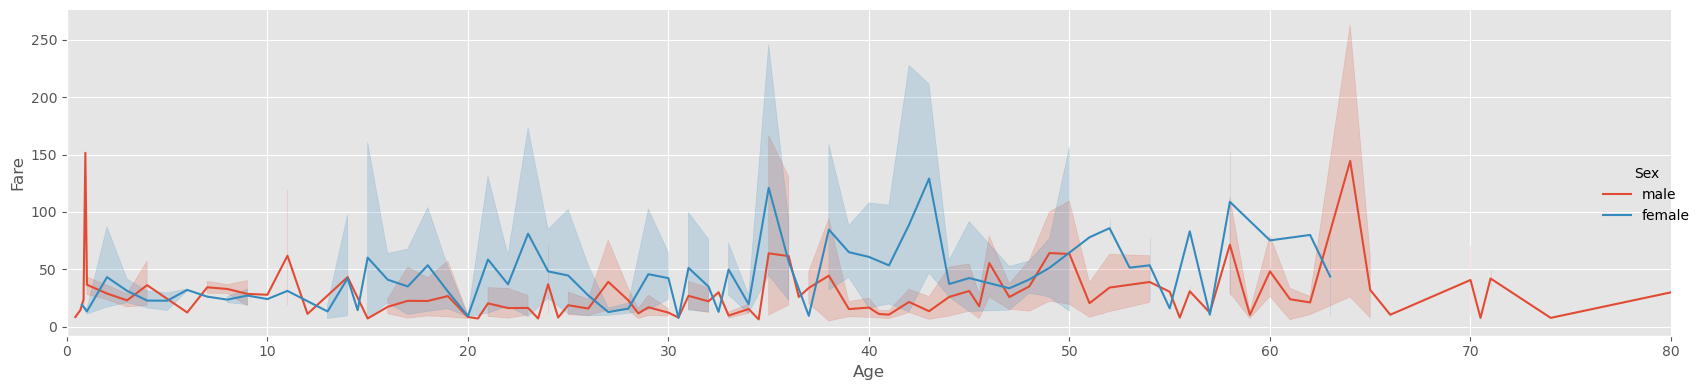

In [397]:
# Create a relplot with KDE plots using hue for 'Sex'
g = sns.relplot(x='Age', y='Fare', hue='Sex', aspect=4, kind='line', data=titanic_df, height=4)

# Set x-axis limit based on the oldest age
oldest = titanic_df['Age'].max()
g.set(xlim=(0, oldest))

# Add legend
g.add_legend()

plt.show()


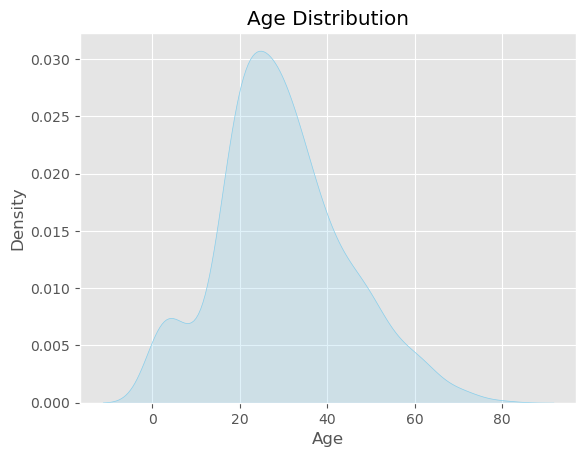

In [398]:
# Plot the age distribution using a KDE plot
sns.kdeplot(titanic_df['Age'], fill=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()



The resulting plot is a KDE plot that provides a smoothed estimate of the probability density function for the distribution of ages in the dataset. The filled area under the curve represents the density, and the plot is labeled with a title and axis labels for clarity.

This type of plot is useful for visualizing the distribution of a continuous variable, such as age, and provides a smooth representation of the underlying probability density. The title and axis labels enhance the interpretability of the plot.

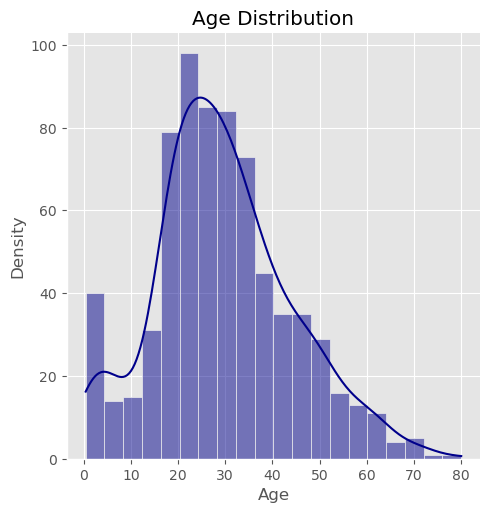

In [399]:
sns.displot(titanic_df['Age'], kde=True, color='darkblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


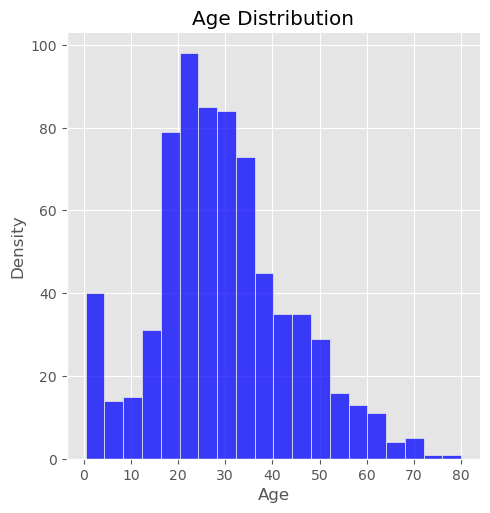

In [400]:
sns.displot(titanic_df['Age'], kde=False, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


<Figure size 2400x1200 with 0 Axes>

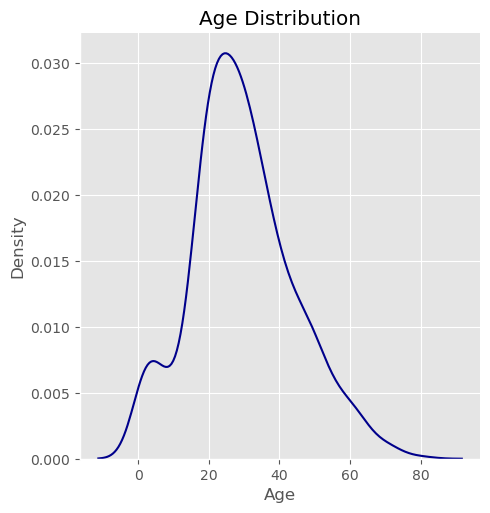

In [401]:
plt.figure(figsize = (12,6), dpi =200)
sns.displot(titanic_df['Age'], kind='kde', color='darkblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


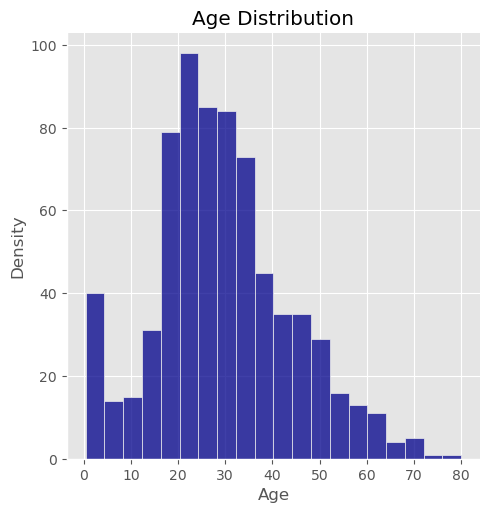

In [402]:
plot = sns.displot(titanic_df['Age'], kde=False, color='darkblue')
plot.set(title='Age Distribution', xlabel='Age', ylabel='Density')
plt.show()


The choice between `kdeplot` and `distplot` depends on your specific visualization needs and preferences. Here are some considerations to help you decide when to use each:

### Use Cases for `kdeplot`:

1. **Smoothed Density Estimate:**
   - Use `kdeplot` when you want a smoothed estimate of the probability density function (PDF) for a univariate dataset.
   - Ideal for visualizing the overall shape and distribution of continuous data.

2. **Flexibility in Kernel and Bandwidth:**
   - `kdeplot` allows you to choose different kernel functions and bandwidths, giving you flexibility in controlling the smoothness and sensitivity to data features.

3. **Exploratory Data Analysis:**
   - Well-suited for exploratory data analysis when you want a continuous representation of the data distribution.

**Example:**
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot
sns.kdeplot(titanic_df['Age'], fill=True, color='skyblue')
plt.title('Age Distribution (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
```

### Use Cases for `distplot`:

1. **Combining Histogram and KDE:**
   - Use `distplot` when you want a combination of a histogram and a KDE plot in a single figure.
   - Helpful for understanding both the bin counts and the overall shape of the distribution.

2. **Binned Counts:**
   - Provides a visualization of the distribution with binned counts, offering more detailed information about the data distribution.

3. **Legacy Compatibility:**
   - If you are using an older version of Seaborn (prior to 0.11.0), `distplot` is available for creating combined distribution plots.

**Example:**
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot
sns.distplot(titanic_df['Age'], hist=True, kde=True, color='skyblue')
plt.title('Age Distribution (Distplot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
```

### Criteria to Choose:

1. **Desired Level of Detail:**
   - If you want a smoother representation with fewer visual details, `kdeplot` may be more suitable.
   - If you want a detailed view with binned counts and a clear representation of both the histogram and KDE, `distplot` might be more appropriate.

2. **Seaborn Version:**
   - If you are using Seaborn version 0.11.0 or later, it is recommended to use `displot` (figure-level function) or `histplot` (axes-level function) instead of `distplot`. These newer functions provide a more consistent and flexible interface.

3. **Specific Requirements:**
   - Choose based on your specific requirements for data exploration, analysis, and communication of the distribution characteristics.

Both `kdeplot` and `distplot` serve valuable purposes, and your choice depends on the specific context of your data and analysis goals.

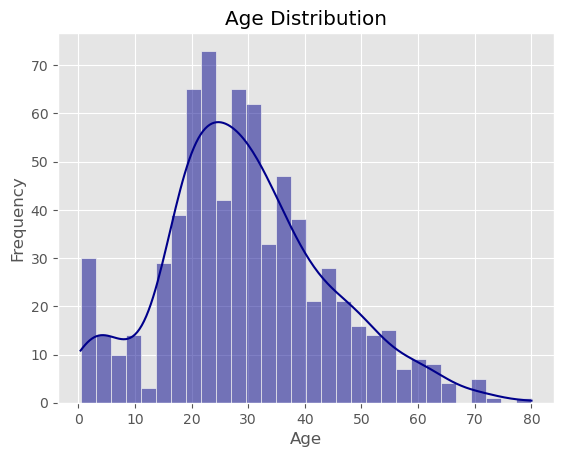

In [403]:
# Plot the age distribution using a histogram
sns.histplot(titanic_df['Age'], bins=30, kde=True, color='darkblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


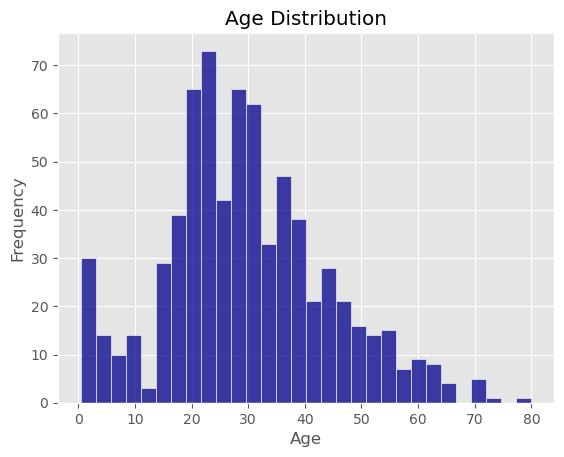

In [404]:
sns.histplot(titanic_df['Age'], bins=30, kde=False, color='darkblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


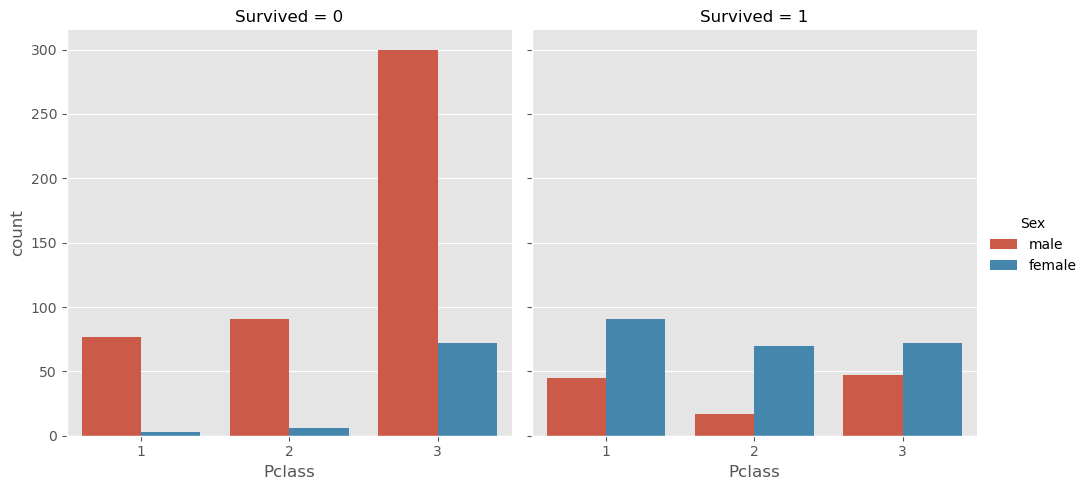

In [405]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=titanic_df, kind="count")
plt.show()


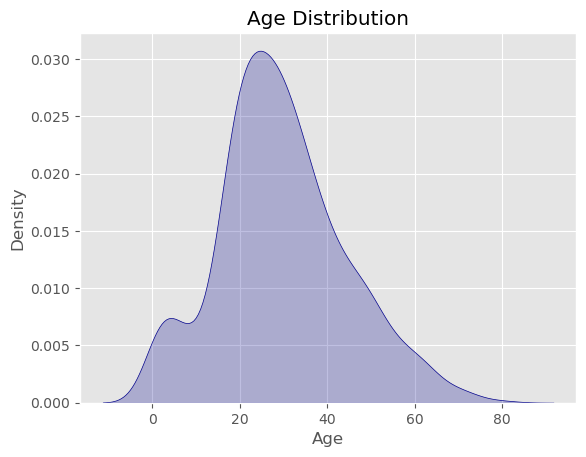

In [406]:
sns.kdeplot(titanic_df['Age'], fill=True, color='darkblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


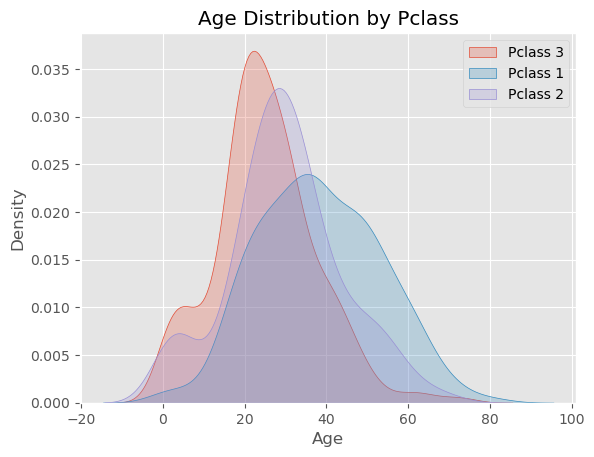

In [407]:
# Create KDE plots for each Pclass
for pclass in titanic_df['Pclass'].unique():
    subset = titanic_df[titanic_df['Pclass'] == pclass]
    sns.kdeplot(subset['Age'], fill=True, label=f'Pclass {pclass}')

plt.title('Age Distribution by Pclass')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


This code creates Kernel Density Estimate (KDE) plots for the age distribution within each passenger class (Pclass) in the Titanic dataset. Let's break down the code:

```python
# Create KDE plots for each Pclass
for pclass in titanic_df['Pclass'].unique():
    subset = titanic_df[titanic_df['Pclass'] == pclass]
    sns.kdeplot(subset['Age'], fill=True, label=f'Pclass {pclass}')

plt.title('Age Distribution by Pclass')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
```

1. **`for pclass in titanic_df['Pclass'].unique():`**:
   - This loop iterates over each unique passenger class in the 'Pclass' column of the `titanic_df` DataFrame.

2. **`subset = titanic_df[titanic_df['Pclass'] == pclass]`**:
   - For each iteration, it creates a subset DataFrame containing only the rows where the 'Pclass' matches the current iteration value.

3. **`sns.kdeplot(subset['Age'], fill=True, label=f'Pclass {pclass}')`**:
   - This line creates a KDE plot for the 'Age' column within the current passenger class subset.
   - The `fill=True` parameter fills the area under the KDE curve.
   - The `label=f'Pclass {pclass}'` parameter assigns a label to each plot for inclusion in the legend. It indicates the passenger class associated with each KDE plot.

4. **`plt.title('Age Distribution by Pclass')`**:
   - Sets the title of the plot to 'Age Distribution by Pclass'.

5. **`plt.xlabel('Age')`**:
   - Sets the label for the x-axis to 'Age'.

6. **`plt.ylabel('Density')`**:
   - Sets the label for the y-axis to 'Density'.

7. **`plt.legend()`**:
   - Displays the legend, which shows labels associated with each passenger class in the plot.

8. **`plt.show()`**:
   - Displays the final plot.

The resulting plot shows KDE plots for the age distribution within each passenger class, allowing for a visual comparison of age distributions across different classes. The legend helps in identifying which curve corresponds to each passenger class. This type of visualization is useful for understanding how age is distributed within different groups or categories in the dataset.

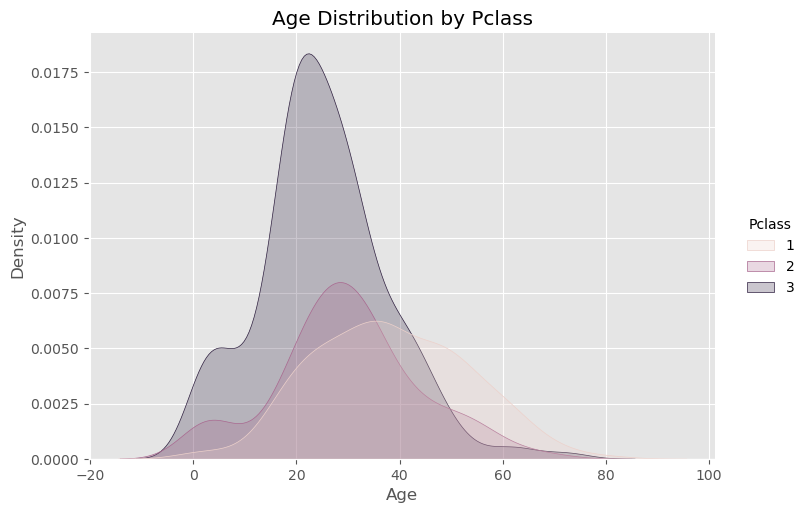

In [408]:
sns.displot(titanic_df, x='Age', hue='Pclass', kind='kde', fill=True, height=5, aspect=1.5)
plt.title('Age Distribution by Pclass')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


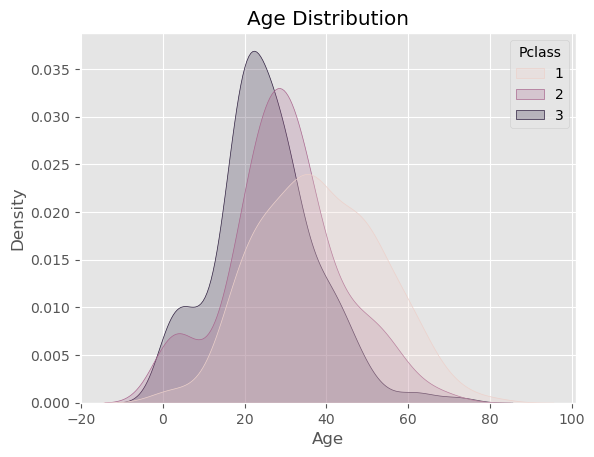

In [409]:
# Create KDE plot with hue
sns.kdeplot(x='Age', fill=True, hue='Pclass', data=titanic_df, common_norm=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


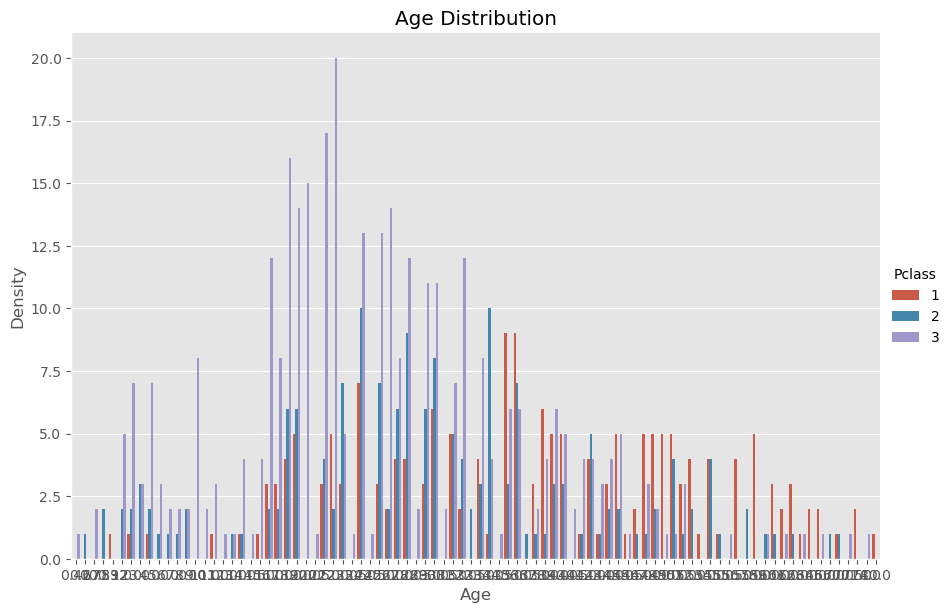

In [410]:
# Create KDE plots using catplot
sns.catplot(x='Age', fill=True, hue='Pclass', kind='count', data=titanic_df, height=6, aspect=1.5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


## What deck were the passengers on and how does that relate to their class

In [411]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_members,person,Survivor,Deck,has_family,Has_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,with Family,male,no,Unknown,with Family,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,with Family,female,yes,C,with Family,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Alone,female,yes,Unknown,Alone,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,with Family,female,yes,C,with Family,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Alone,male,no,Unknown,Alone,Alone


### the cabin has several null values s o we should drop it

In [412]:
deck = titanic_df['Cabin'].dropna()

In [413]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

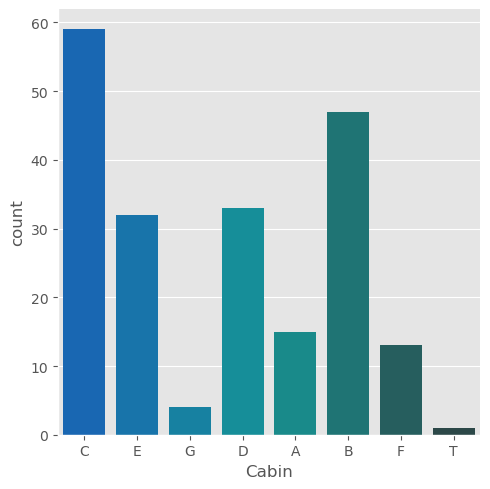

In [414]:
# Assuming 'deck' is a list or Series containing cabin information

levels = []

for level in deck:
    levels.append(level[0])

# Create a DataFrame from the 'levels' list
cabin_df = pd.DataFrame(levels, columns=['Cabin'])

# Use 'palette' instead of 'pallete'
sns.catplot(x='Cabin', data=cabin_df, palette='winter_d', kind='count')


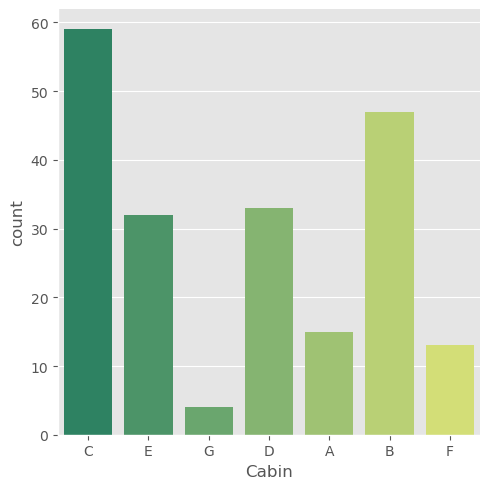

In [415]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot( x= 'Cabin', data=cabin_df, palette = 'summer',kind = 'count')



Explanation:

1. **`cabin_df = cabin_df[cabin_df['Cabin'] != 'T']`**: Filters the DataFrame to exclude rows where the 'Cabin' column is equal to 'T'. This step removes the 'T' cabin from the data before creating the count plot.

2. **`sns.catplot(x='Cabin', data=cabin_df, palette='summer', kind='count')`**: Uses Seaborn's `catplot` to create a count plot of the cabin levels after excluding 'T'. The 'x' parameter specifies the variable on the x-axis, 'data' is the DataFrame, 'palette' sets the color palette, and 'kind' specifies the type of plot (count plot).

3. **`plt.show()`**: Displays the plot.

This corrected code should generate a count plot of cabin levels excluding the 'T' cabin, using the 'summer' color palette.

In [416]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_members,person,Survivor,Deck,has_family,Has_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,with Family,male,no,Unknown,with Family,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,with Family,female,yes,C,with Family,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Alone,female,yes,Unknown,Alone,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,with Family,female,yes,C,with Family,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Alone,male,no,Unknown,Alone,Alone


In [417]:
#where people came from

<Figure size 2400x1000 with 0 Axes>

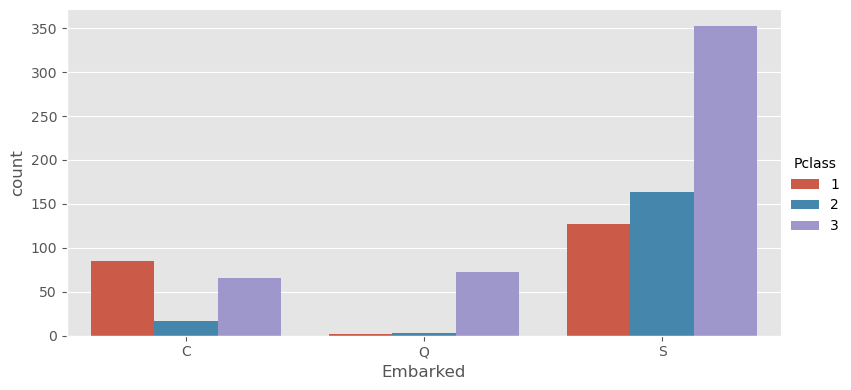

In [418]:

plt.figure(figsize=(12, 5), dpi=200)
sns.catplot(x="Embarked", data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'], kind='count', height=4, aspect=2)
plt.show()

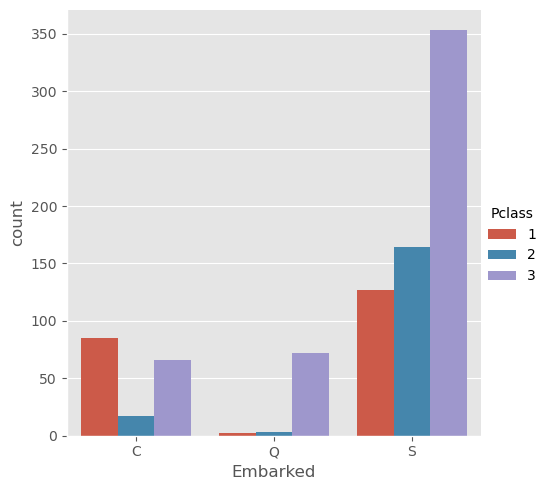

In [419]:

# Use 'order' instead of 'x_order', and 'hue' as 'pclass'
sns.catplot(x="Embarked", data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'], kind='count')

plt.show()


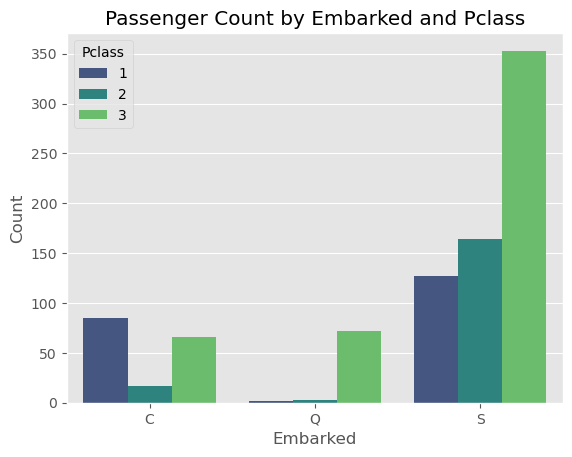

In [420]:
# Create a count plot with hue
sns.countplot(x="Embarked", data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'], palette='viridis')
plt.title('Passenger Count by Embarked and Pclass')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


## who was alone and who was with family

In [421]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_members,person,Survivor,Deck,has_family,Has_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,with Family,male,no,Unknown,with Family,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,with Family,female,yes,C,with Family,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Alone,female,yes,Unknown,Alone,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,with Family,female,yes,C,with Family,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Alone,male,no,Unknown,Alone,Alone


In [422]:
titanic_df['family_members']

0      with Family
1      with Family
2            Alone
3      with Family
4            Alone
          ...     
886          Alone
887          Alone
888    with Family
889          Alone
890          Alone
Name: family_members, Length: 891, dtype: object

In [423]:
## if anythng non zero so some of the family member were presnt

In [424]:
titanic_df['family_members'].head()

0    with Family
1    with Family
2          Alone
3    with Family
4          Alone
Name: family_members, dtype: object

In [425]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_members,person,Survivor,Deck,has_family,Has_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,with Family,male,no,Unknown,with Family,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,with Family,female,yes,C,with Family,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Alone,female,yes,Unknown,Alone,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,with Family,female,yes,C,with Family,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Alone,male,no,Unknown,Alone,Alone


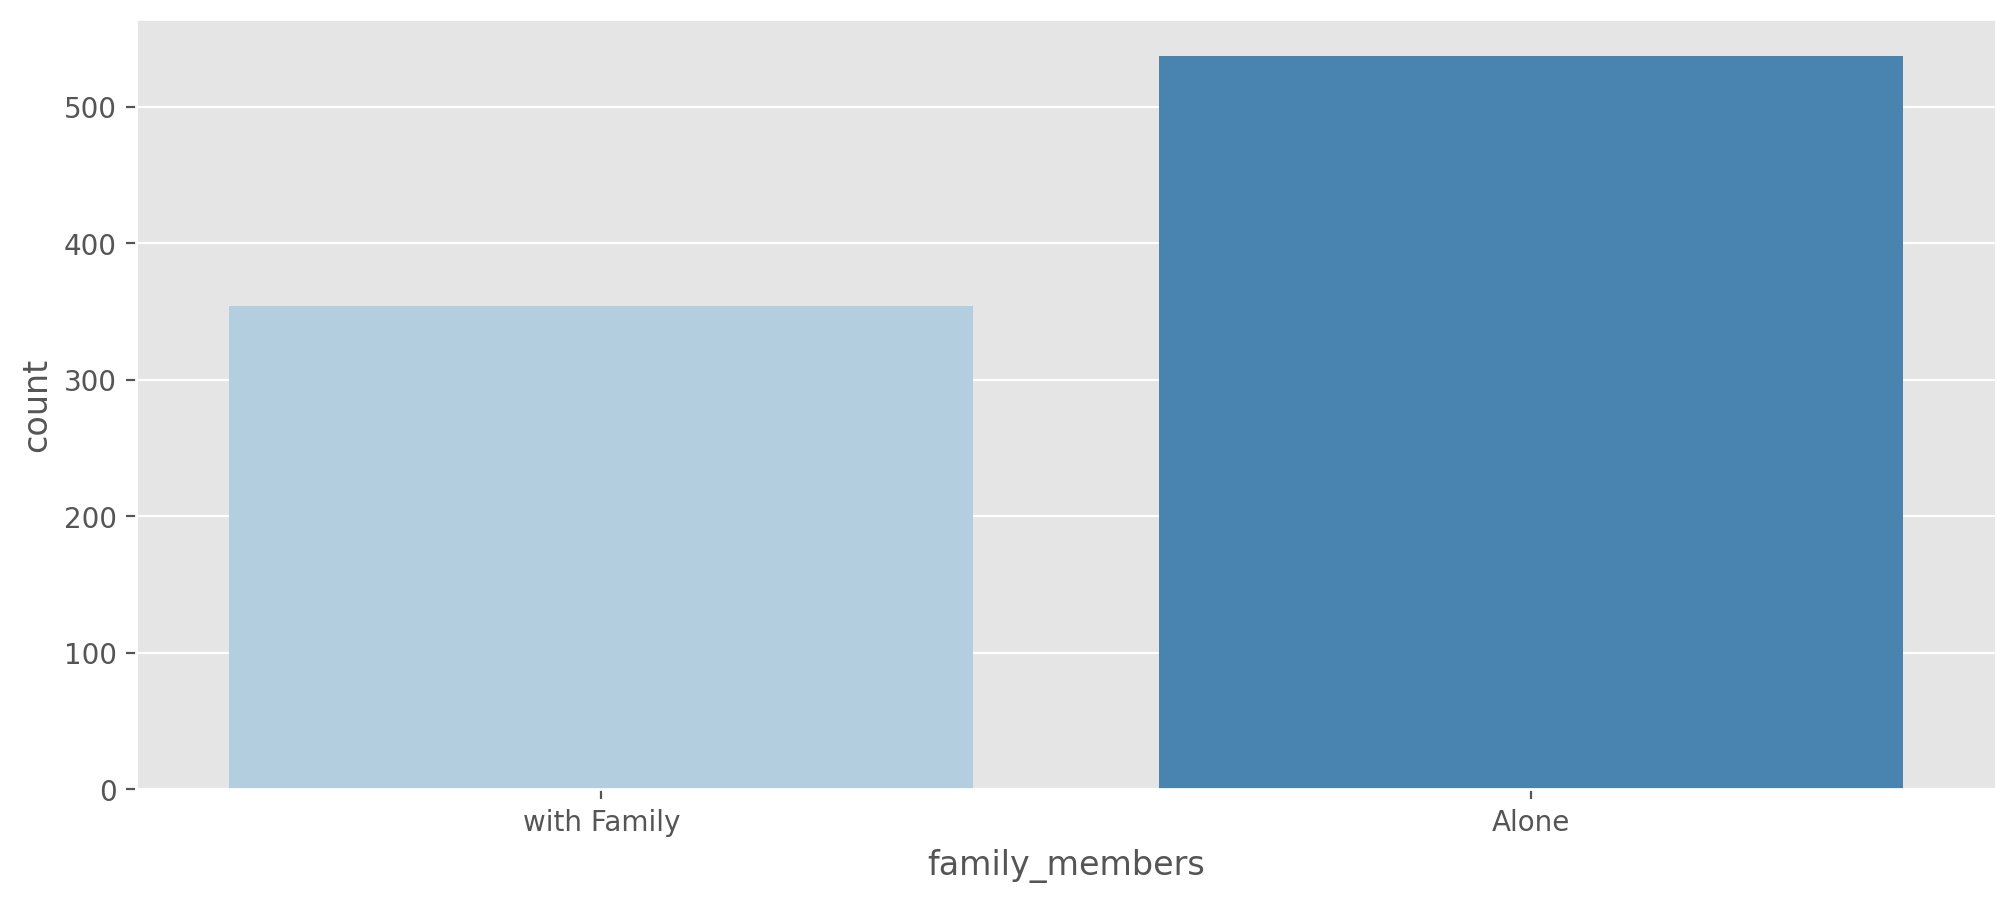

In [426]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot(x='family_members', data =titanic_df, palette ='Blues')
plt.show()


### what factors helped someone survive the sinking or crash of the titanic

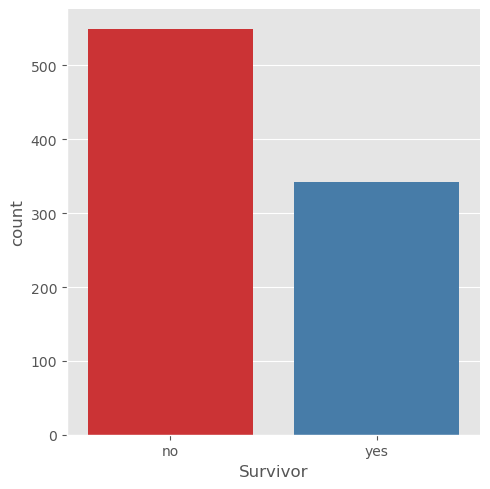

In [427]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot(x='Survivor', data=titanic_df,palette ='Set1',kind='count')

#which factors have diffrent effectson their survival rates

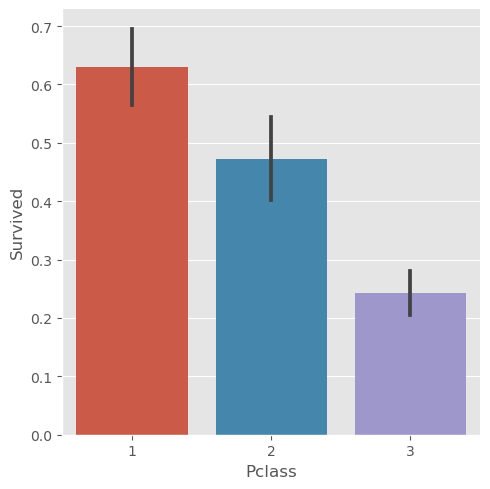

In [428]:
sns.catplot(x='Pclass', y='Survived', data=titanic_df, kind='bar')

plt.show()


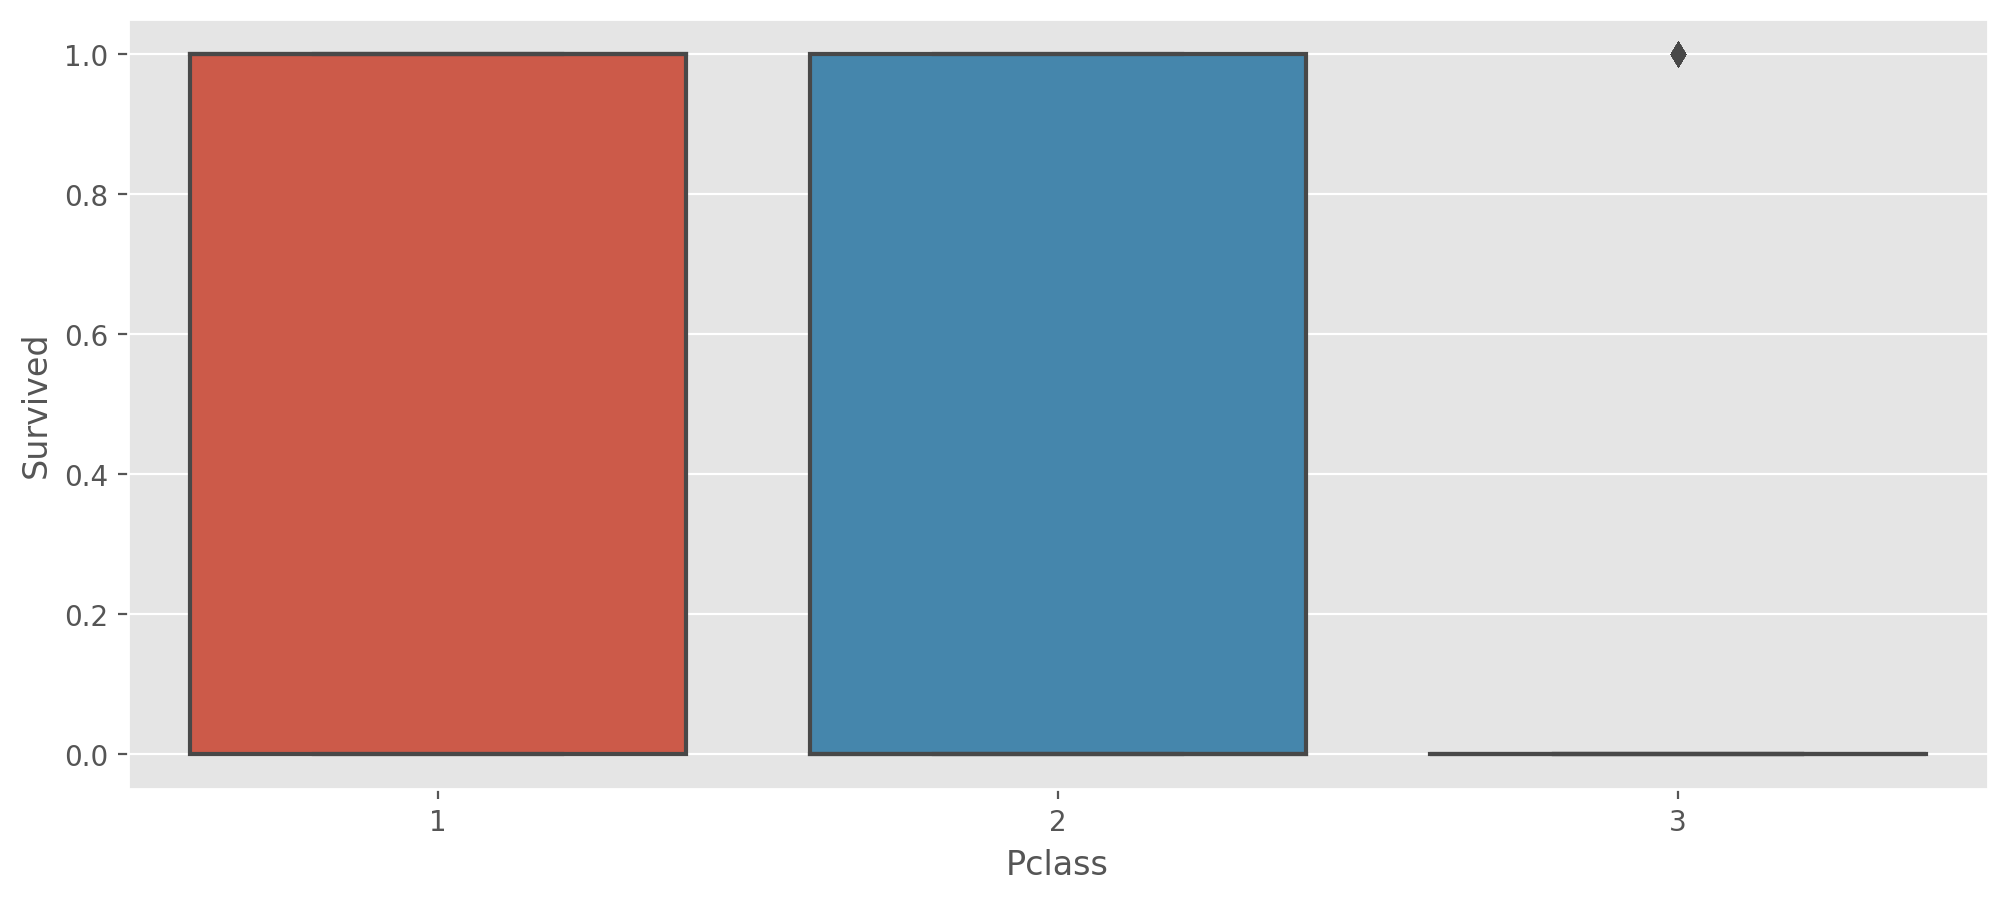

In [429]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot(x='Pclass', y='Survived', data=titanic_df)

plt.show()


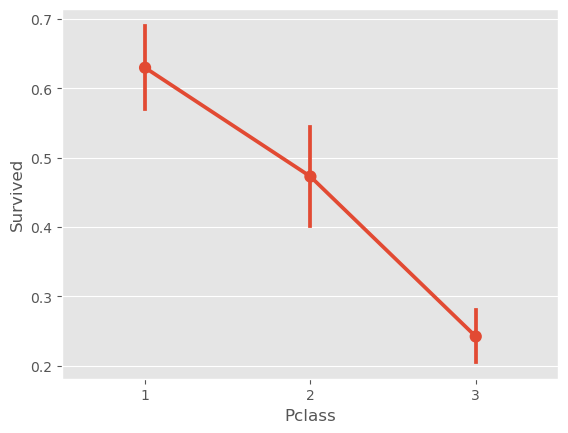

In [430]:
sns.pointplot(x='Pclass', y='Survived', data=titanic_df)

plt.show()


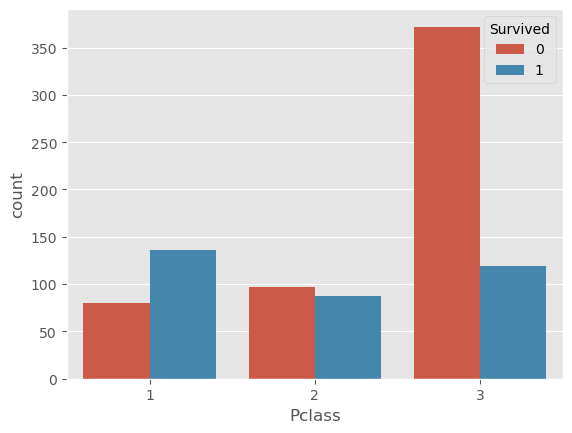

In [431]:
# Method 2: Using countplot
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)

plt.show()

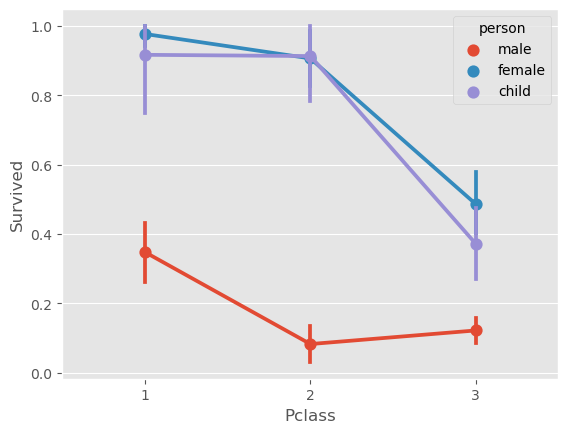

In [432]:
sns.pointplot(x='Pclass', y='Survived',hue ='person', data=titanic_df)

plt.show()


in above we came to know that male cannot surve in any of the class

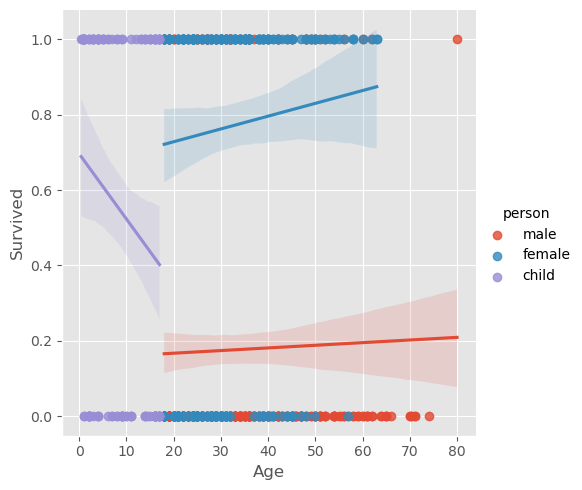

In [433]:
sns.lmplot(x='Age',y='Survived',hue='person',data=titanic_df)

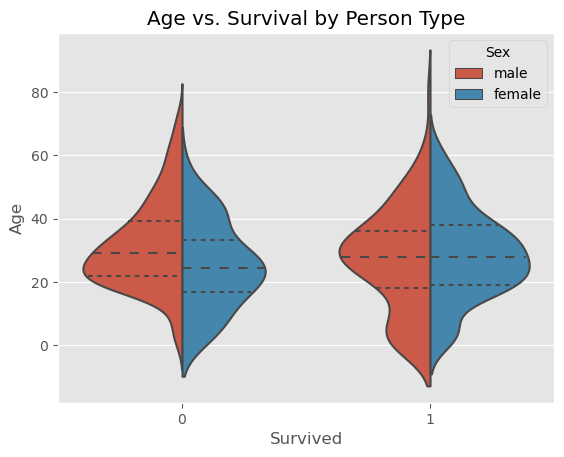

In [434]:
# Filter out missing values for 'Age'
titanic_df_filtered = titanic_df.dropna(subset=['Age'])

# Create a violin plot
sns.violinplot(x='Survived', y='Age', hue='Sex', data=titanic_df_filtered, split=True, inner='quartile')

plt.title('Age vs. Survival by Person Type')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


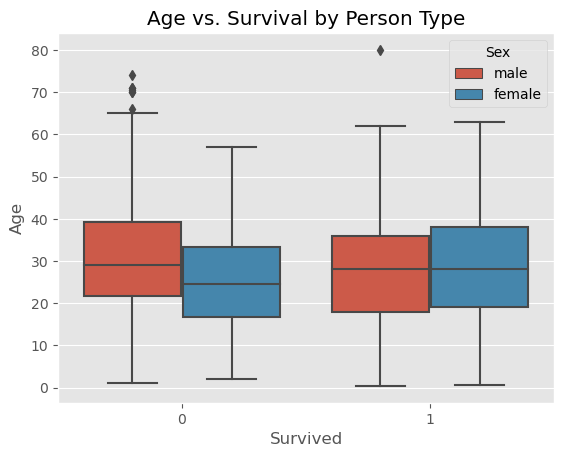

In [435]:

# Filter out missing values for 'Age'
titanic_df_filtered = titanic_df.dropna(subset=['Age'])

# Method 1: Using boxplot
sns.boxplot(x='Survived', y='Age', hue='Sex', data=titanic_df_filtered)

plt.title('Age vs. Survival by Person Type')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


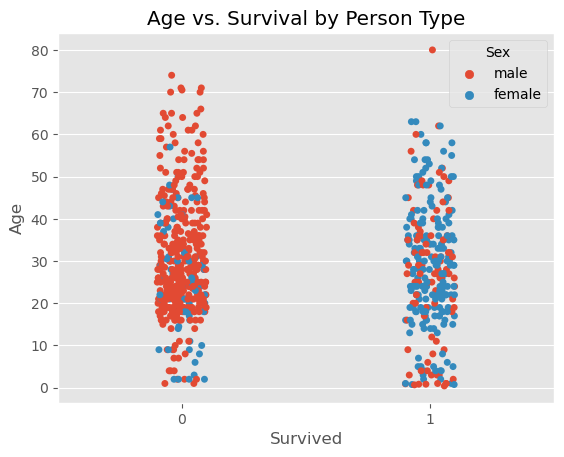

In [436]:
import seaborn as sns
titanic_df_filtered = titanic_df.dropna(subset=['Age'])

# Method 3: Using stripplot
sns.stripplot(x='Survived', y='Age', hue='Sex', data=titanic_df_filtered, jitter=True)

plt.title('Age vs. Survival by Person Type')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


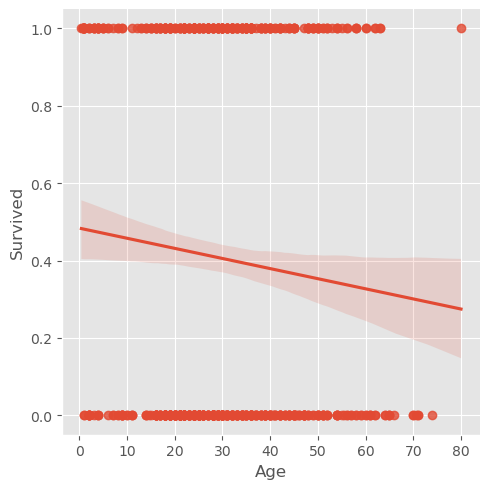

In [437]:
sns.lmplot(x='Age',y='Survived', data=titanic_df)

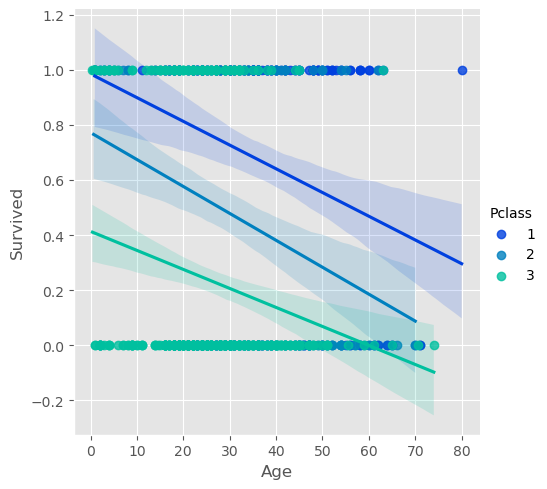

In [438]:
sns.lmplot(x='Age',y='Survived', data=titanic_df, hue ='Pclass',palette ='winter')

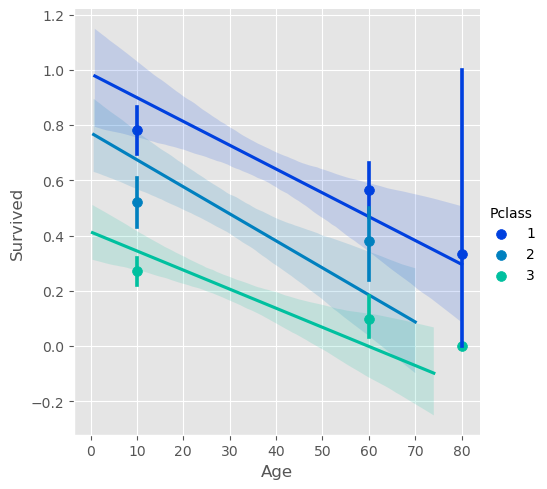

In [439]:
generations = [10,2040,60,80]

sns.lmplot(x='Age', y= 'Survived',hue='Pclass', data= titanic_df,palette='winter',x_bins=generations)

we can see higher std diviation on older people

In [440]:
# age survival

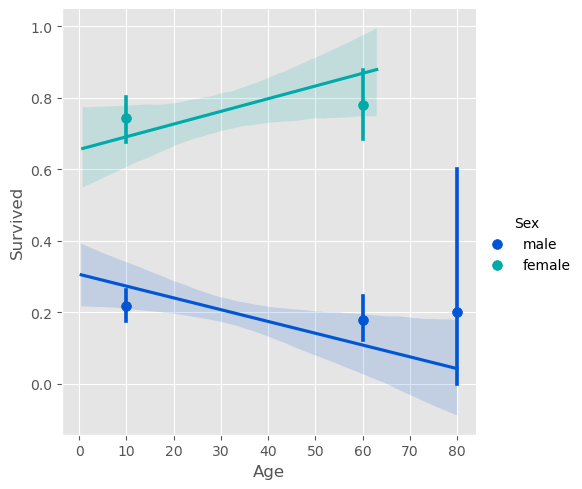

In [441]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

Did the deck have an effect on the passengers survival rate? did this answer matchup with your institution


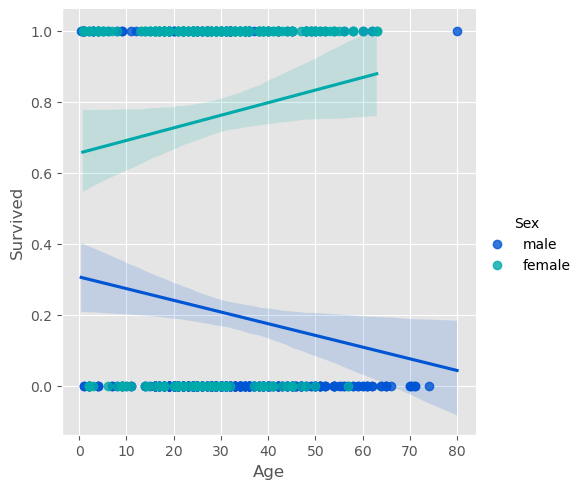

In [448]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='winter')


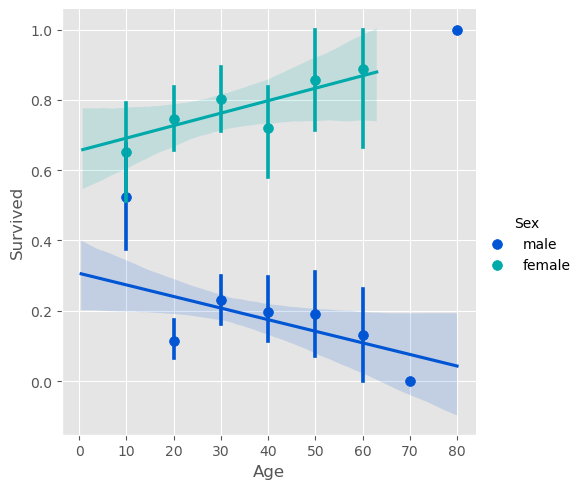

In [449]:
generations = [10,20,30,40,50,60,70,80,90,100]

sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)


In [450]:
titanic_df['Deck'] = titanic_df['Cabin'].str[0]


In [451]:
titanic_df['Deck'].fillna('Unknown', inplace=True)


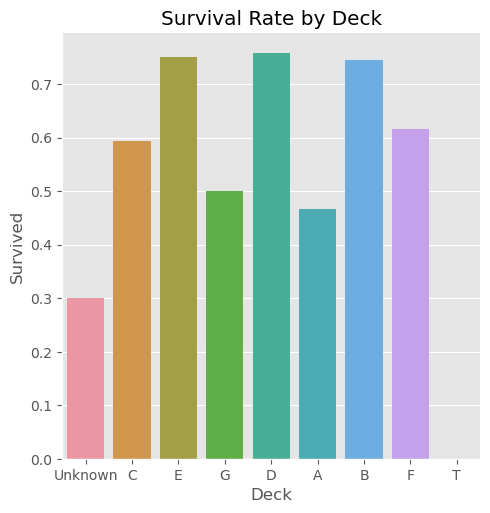

In [452]:
sns.catplot(x='Deck', y='Survived', data=titanic_df, kind='bar', ci=None)
plt.title('Survival Rate by Deck')
plt.show()


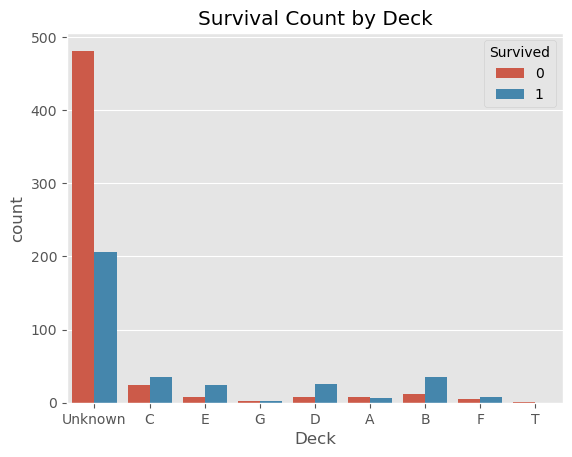

In [453]:
sns.countplot(x='Deck', hue='Survived', data=titanic_df)
plt.title('Survival Count by Deck')
plt.show()


 Comparitively C, B deck people survived more 